# Predicting Heart Failure using Machine Learning Algorithm

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from  google.colab import files
import plotly.express as px

# Data Processing
from sklearn.impute import SimpleImputer
from scipy import stats



In [ ]:
files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (1).csv


{'heart_failure_clinical_records_dataset (1).csv': b'age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT\n75,0,582,0,20,1,265000,1.9,130,1,0,4,1\n55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1\n65,0,146,0,20,0,162000,1.3,129,1,1,7,1\n50,1,111,0,20,0,210000,1.9,137,1,0,7,1\n65,1,160,1,20,0,327000,2.7,116,0,0,8,1\n90,1,47,0,40,1,204000,2.1,132,1,1,8,1\n75,1,246,0,15,0,127000,1.2,137,1,0,10,1\n60,1,315,1,60,0,454000,1.1,131,1,1,10,1\n65,0,157,0,65,0,263358.03,1.5,138,0,0,10,1\n80,1,123,0,35,1,388000,9.4,133,1,1,10,1\n75,1,81,0,38,1,368000,4,131,1,1,10,1\n62,0,231,0,25,1,253000,0.9,140,1,1,10,1\n45,1,981,0,30,0,136000,1.1,137,1,0,11,1\n50,1,168,0,38,1,276000,1.1,137,1,0,11,1\n49,1,80,0,30,1,427000,1,138,0,0,12,0\n82,1,379,0,50,0,47000,1.3,136,1,0,13,1\n87,1,149,0,38,0,262000,0.9,140,1,0,14,1\n45,0,582,0,14,0,166000,0.8,127,1,0,14,1\n70,1,125,0,25,1,237000,1,140,0,0,15,1\n48,1,582,1,55,0,87000,1

# Reading and checking data

In [ ]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')#Data Frame
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.tail(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [ ]:
df.corr()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
makers = df['age'].value_counts().index


In [ ]:
model_count = df['age'].value_counts().values



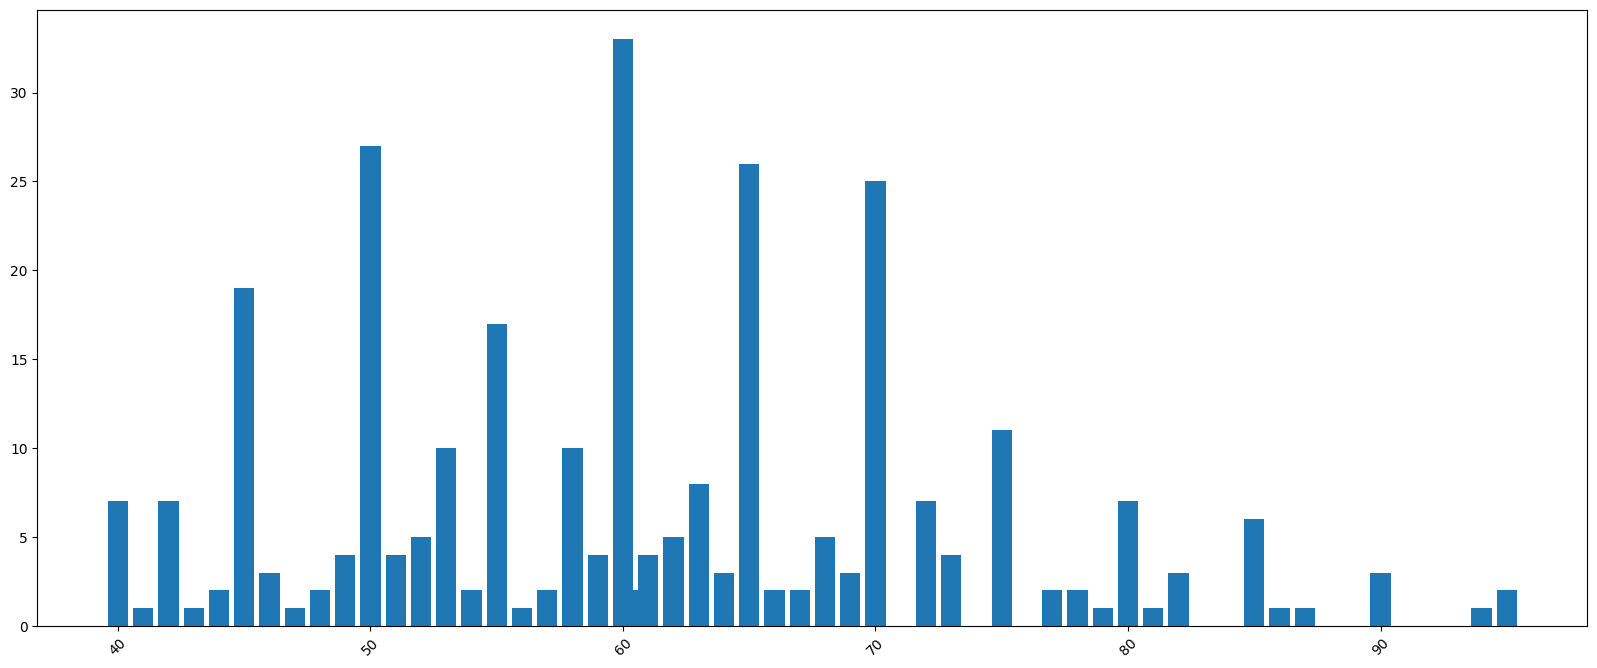

In [ ]:
plt.bar(makers, model_count)
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.isna().values.any()

False

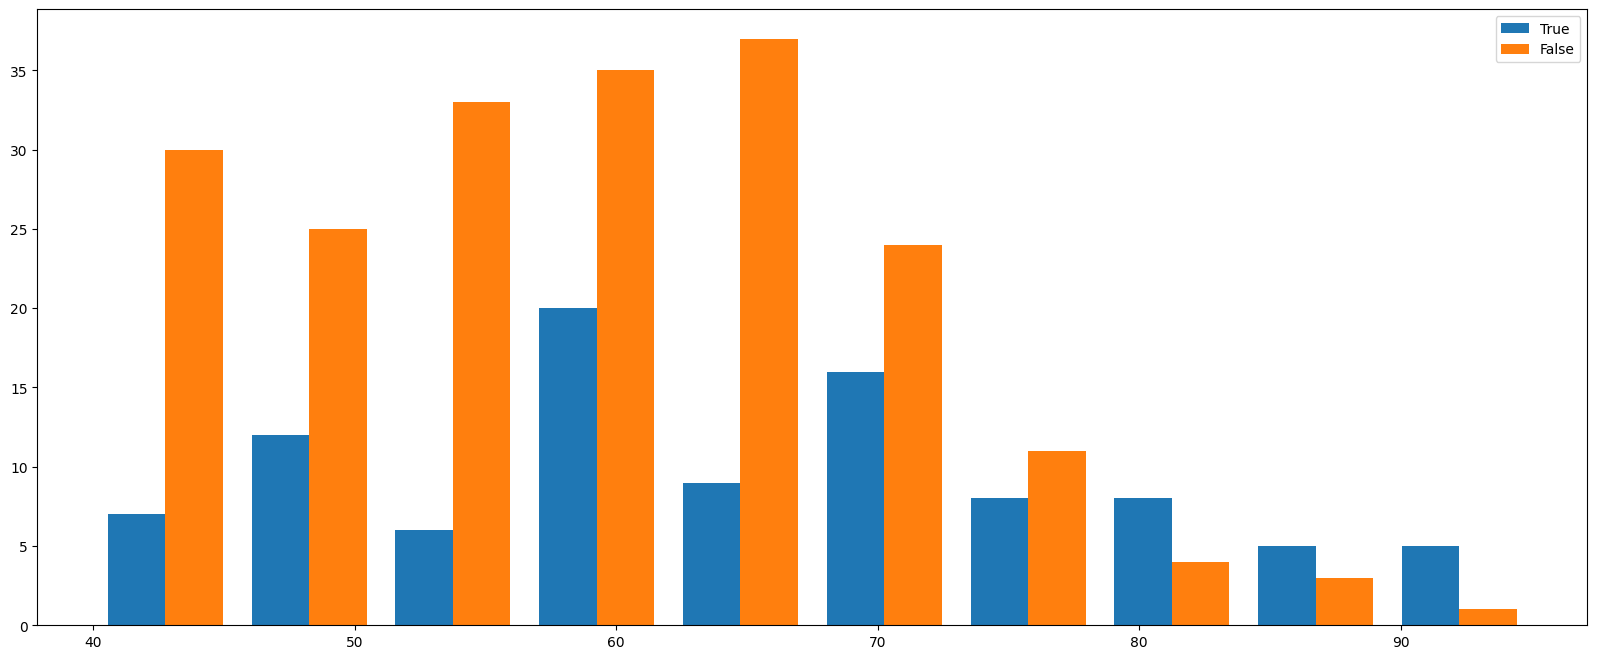

In [ ]:
death_events = df.DEATH_EVENT.unique()
plt.hist([df.loc [df.DEATH_EVENT == e, 'age'] for e in death_events])
plt.legend(death_events.astype('bool'))


# Classification ML

In [ ]:
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

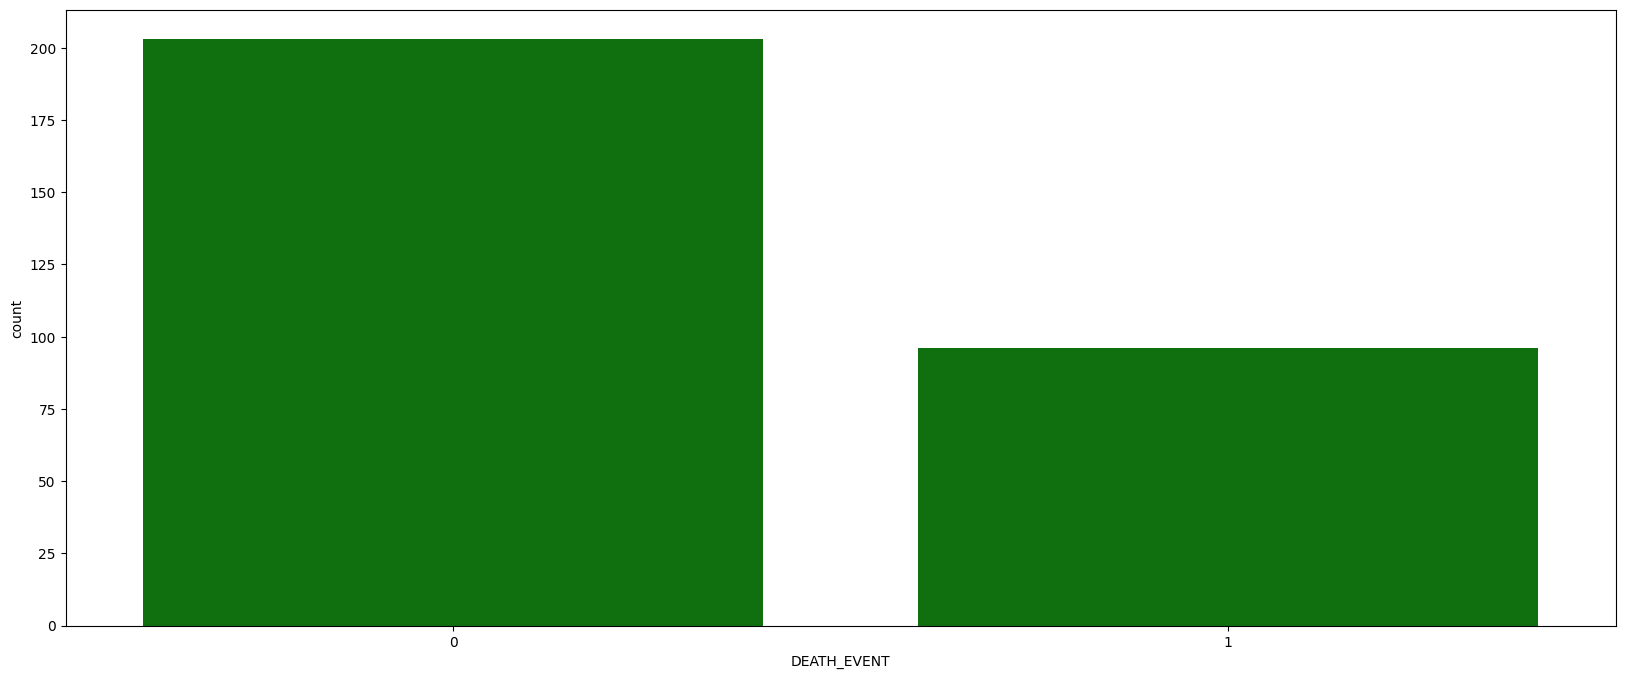

In [ ]:
sns.countplot(data=df, x="DEATH_EVENT", color='green')


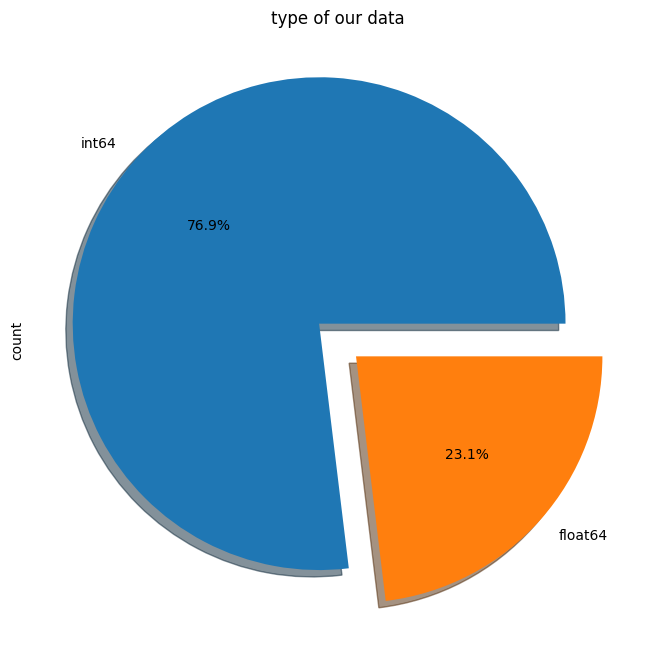

In [ ]:
df.dtypes.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('type of our data');


# Visulazation

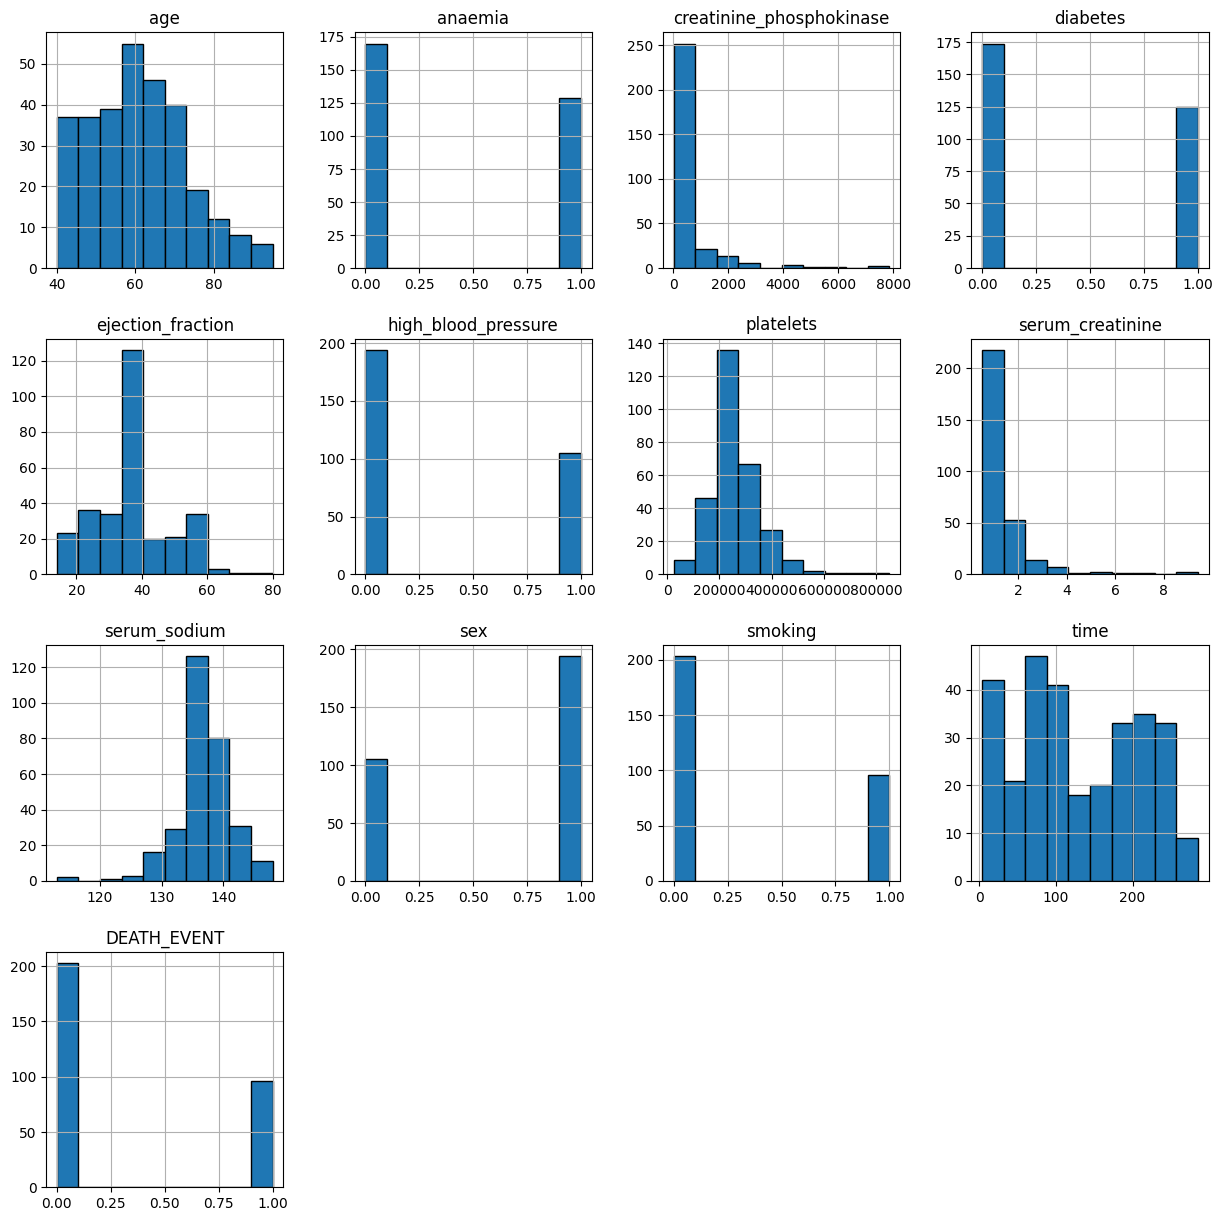

In [ ]:

df.hist(figsize=(15,15),edgecolor='black');

Text(0.5, 1.0, 'the % of deaths')

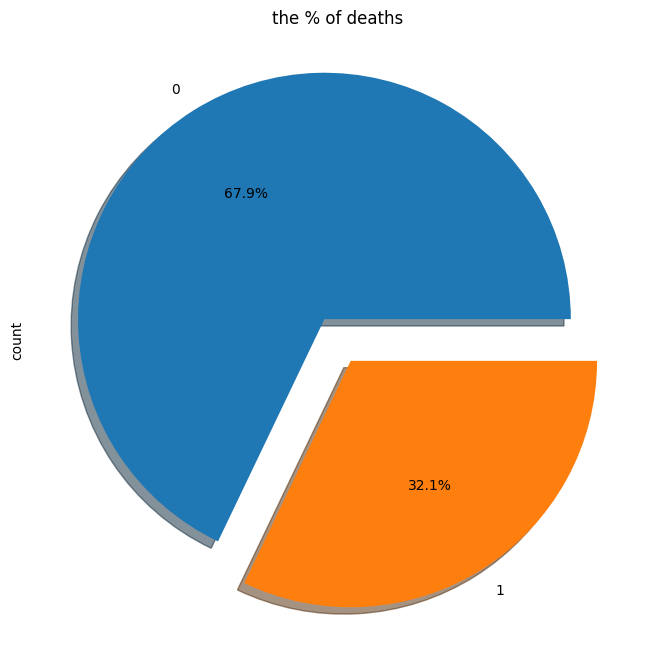

In [ ]:
df.DEATH_EVENT.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('the % of deaths')

# Classification Algorithms

In [ ]:
from sklearn.linear_model import LogisticRegression
method_names=[]
method_scores=[]
lr = LogisticRegression()
param_grid = {
    "C": [1,2,3,3,4,5,6,7,8,9,10],
    "penalty": ["l1", "l2", "elasticnet"]
}

method_names.append("Logistic Regression")
gscv = GridSearchCV(lr, param_grid, cv=5, scoring="accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 3, 4, 5, 6, 7, 8, 9, 10],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [ ]:
print("Best params: ", gscv.best_params_)
print("Best Score: ", gscv.best_score_)

Best params:  {'C': 1, 'penalty': 'l2'}
Best Score:  0.8322695035460992


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix


Score:  0.8


<Axes: >

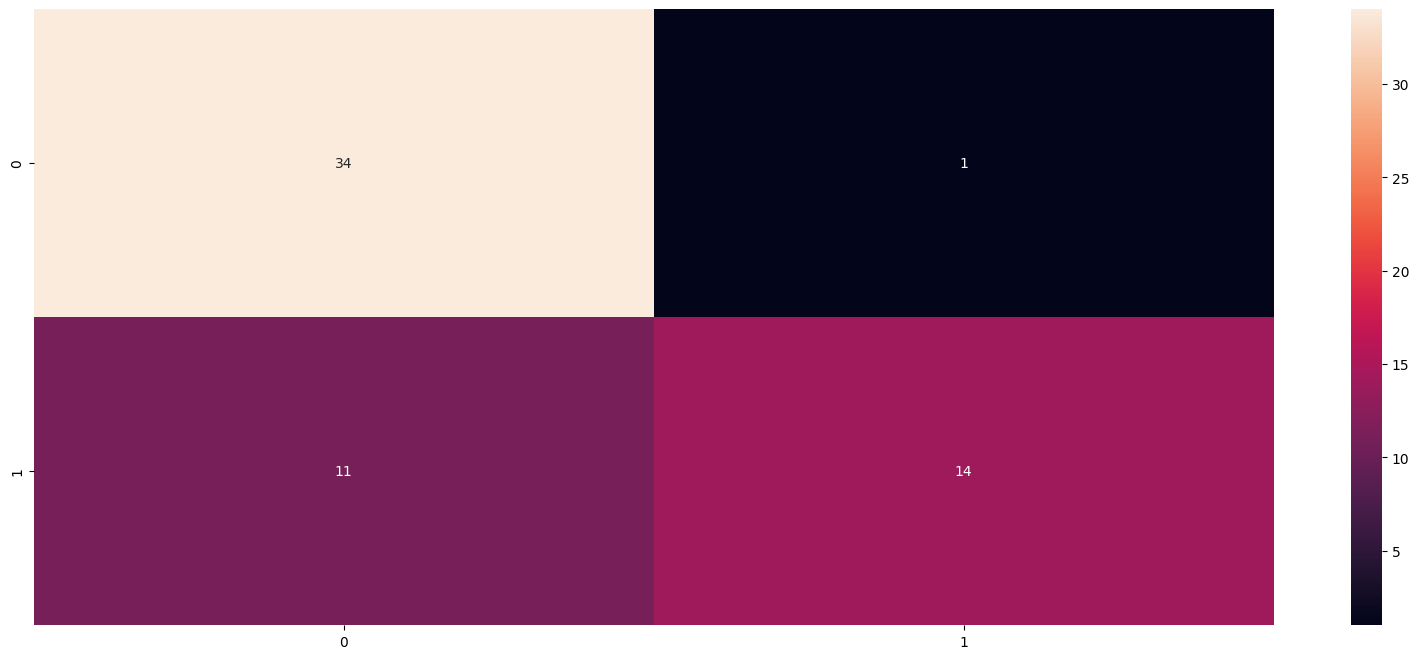

In [ ]:
y_pred = gscv.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Score: ", score)
method_scores.append(score)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

param_grid = {
    "n_neighbors": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,25,27,29, 31]
}

method_names.append("KNN")
gscv = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy")
gscv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 22, 23,
                                         25, 27, 29, 31]},
             scoring='accuracy')

In [ ]:
print("Best params: ", gscv.best_params_)
print("Best Score: ", gscv.best_score_)


Best params:  {'n_neighbors': 7}
Best Score:  0.7656028368794326


Score:  0.6833333333333333


<Axes: >

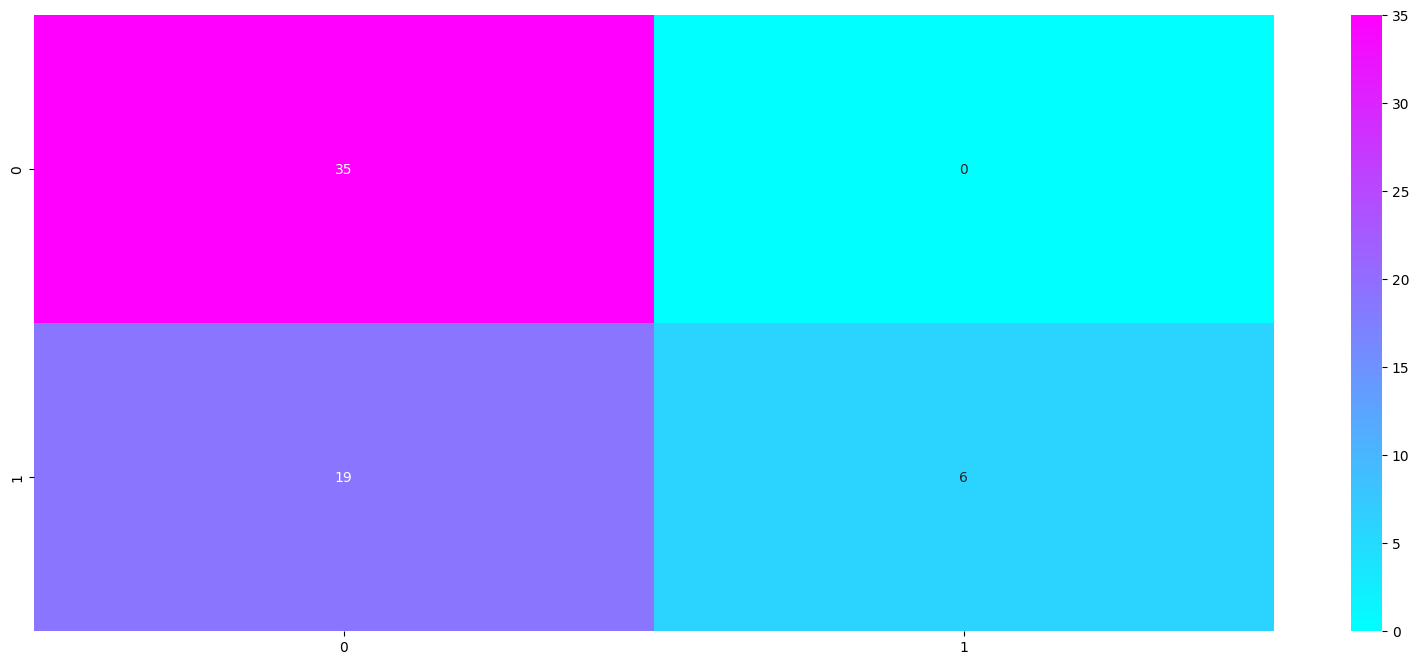

In [ ]:
y_pred = gscv.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Score: ", score)
method_scores.append(score)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="cool")

SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC()

param_grid = {
    "C": [0.1, 0.01, 1, 0.001, 1],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": [0.1, 0.01, 0.001, 1, 10]
}

method_names.append("SVM")
gscv = GridSearchCV(svm, param_grid, cv=5, scoring="accuracy")
gscv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 1, 0.001, 1],
                         'gamma': [0.1, 0.01, 0.001, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [ ]:
print("Best params: ", gscv.best_params_)
print("Best Score: ", gscv.best_score_)


Best params:  {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best Score:  0.8241134751773049


Score:  0.8


<Axes: >

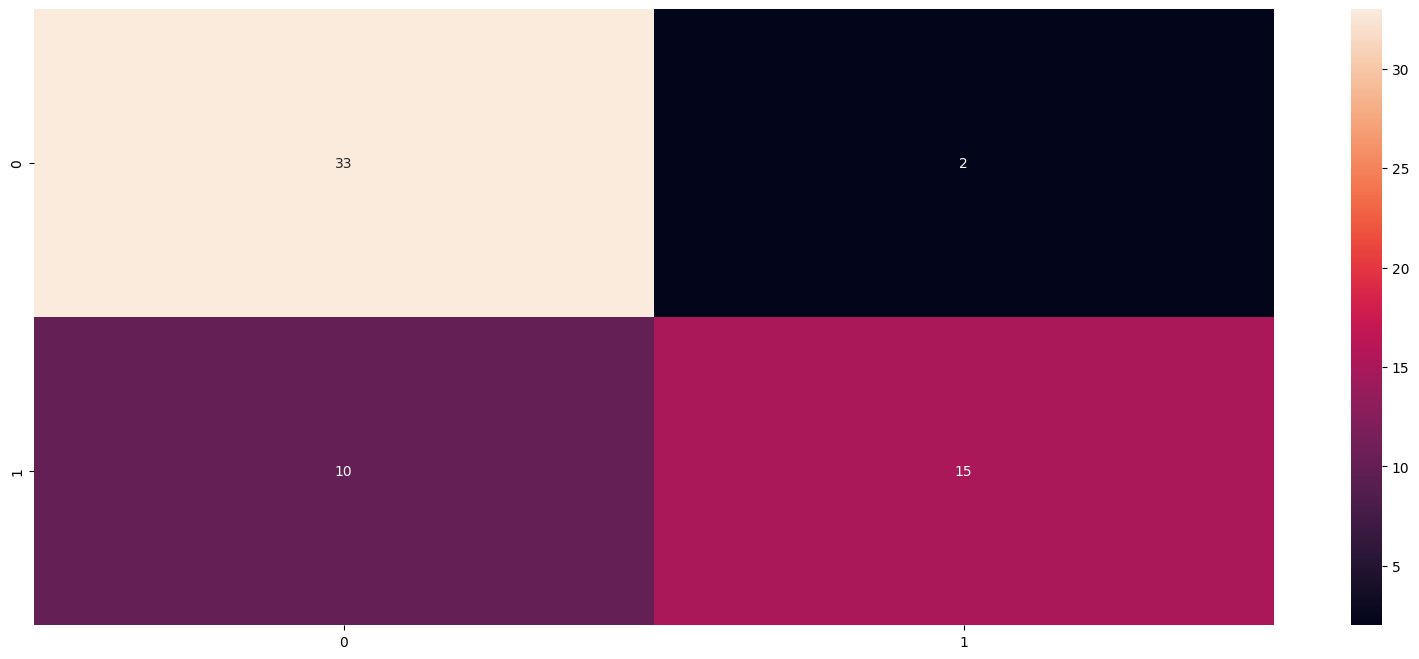

In [ ]:
y_pred = gscv.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Score: ", score)
method_scores.append(score)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

param_grid = {
    "n_estimators": [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
}

method_names.append("Random Forest")
gscv = GridSearchCV(rf, param_grid, cv = 5, scoring="accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550]},
             scoring='accuracy')

In [ ]:
print("Best Params: ", gscv.best_params_)
print("Best score: ", gscv.best_score_)


Best Params:  {'n_estimators': 200}
Best score:  0.8954787234042552


Score:  0.7166666666666667


<Axes: >

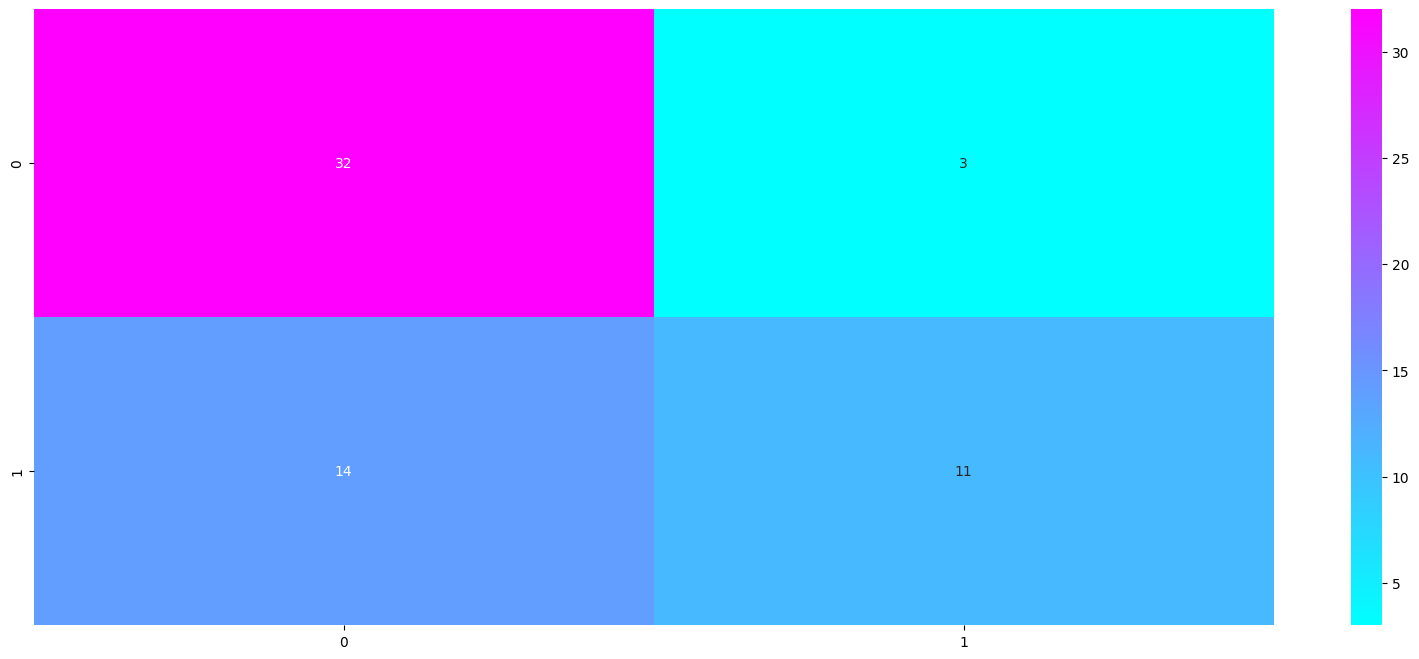

In [ ]:
y_pred = gscv.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Score: ", score)
method_scores.append(score)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d",cmap="cool")

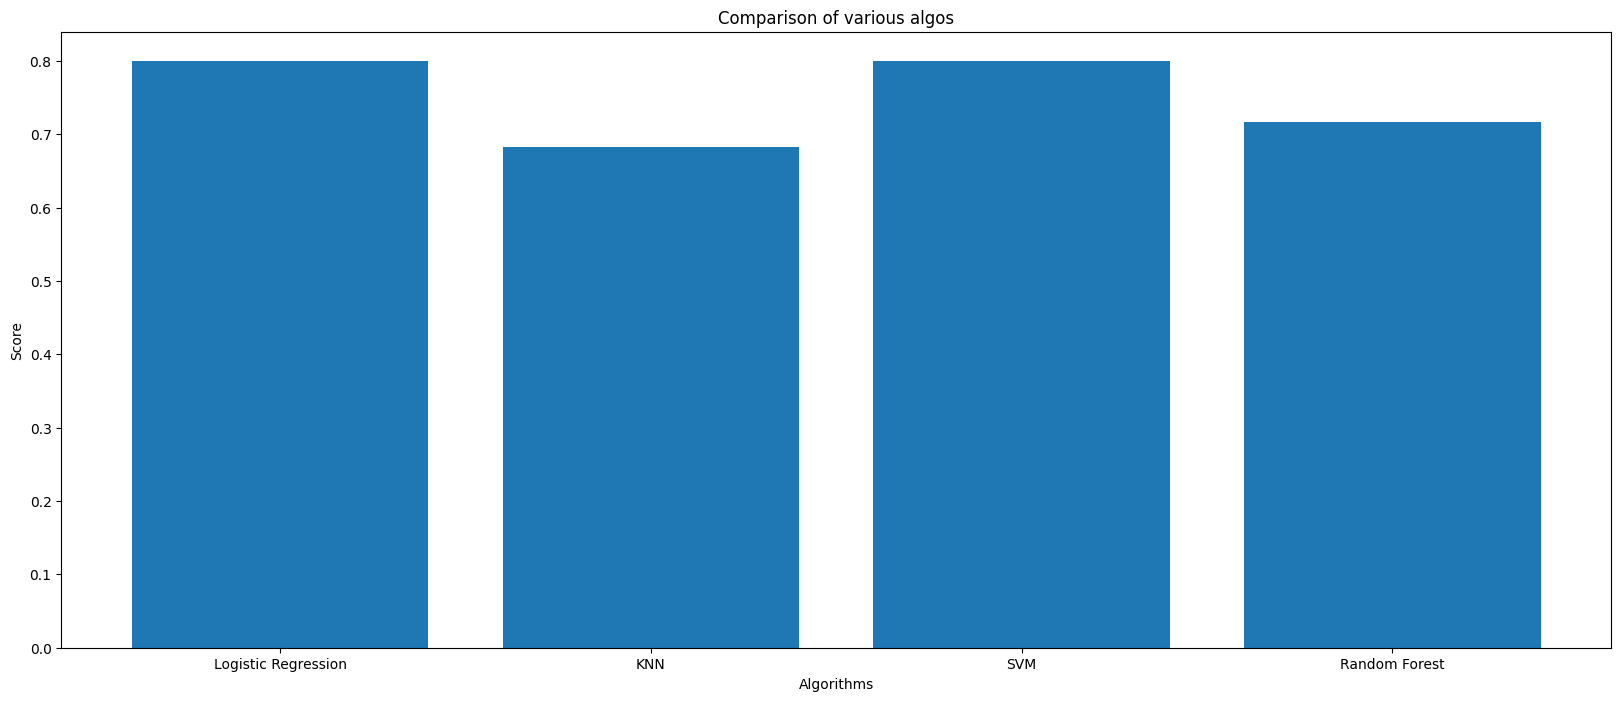

In [ ]:
plt.bar(method_names, method_scores)
plt.title("Comparison of various algos")
plt.xlabel("Algorithms")
plt.ylabel("Score")
plt.show()

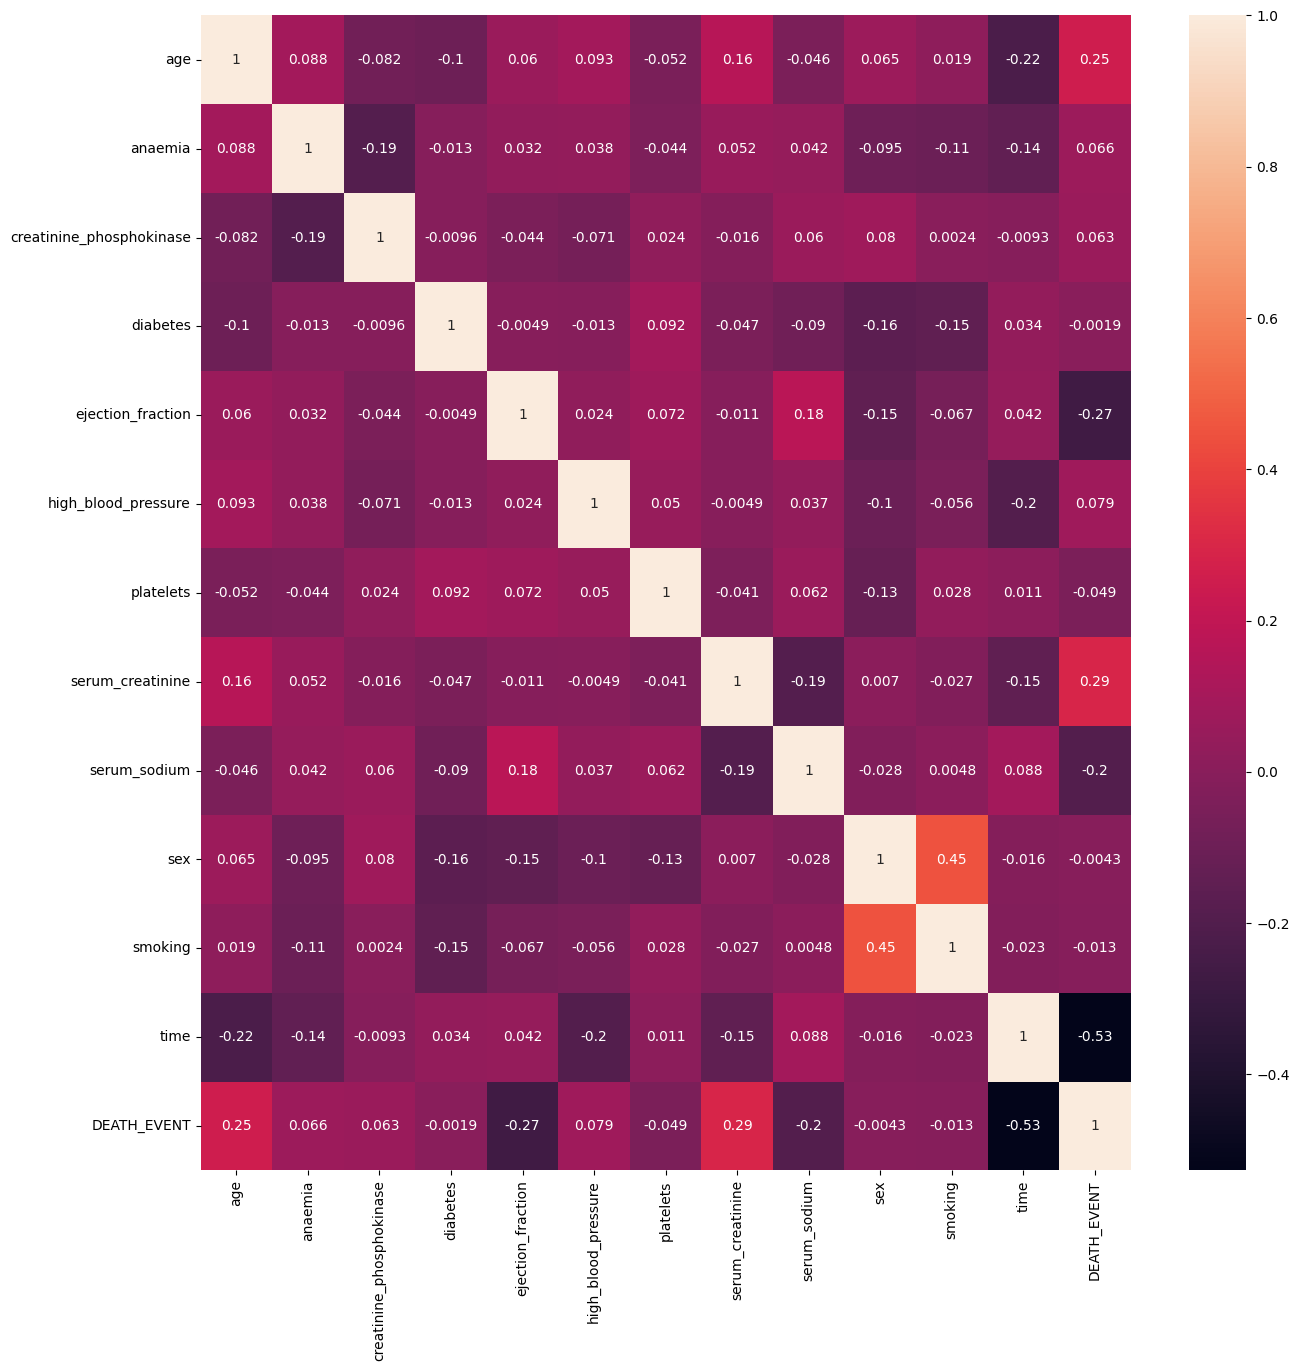

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True);

Decision Tree Score:  0.7333333333333333


<Axes: >

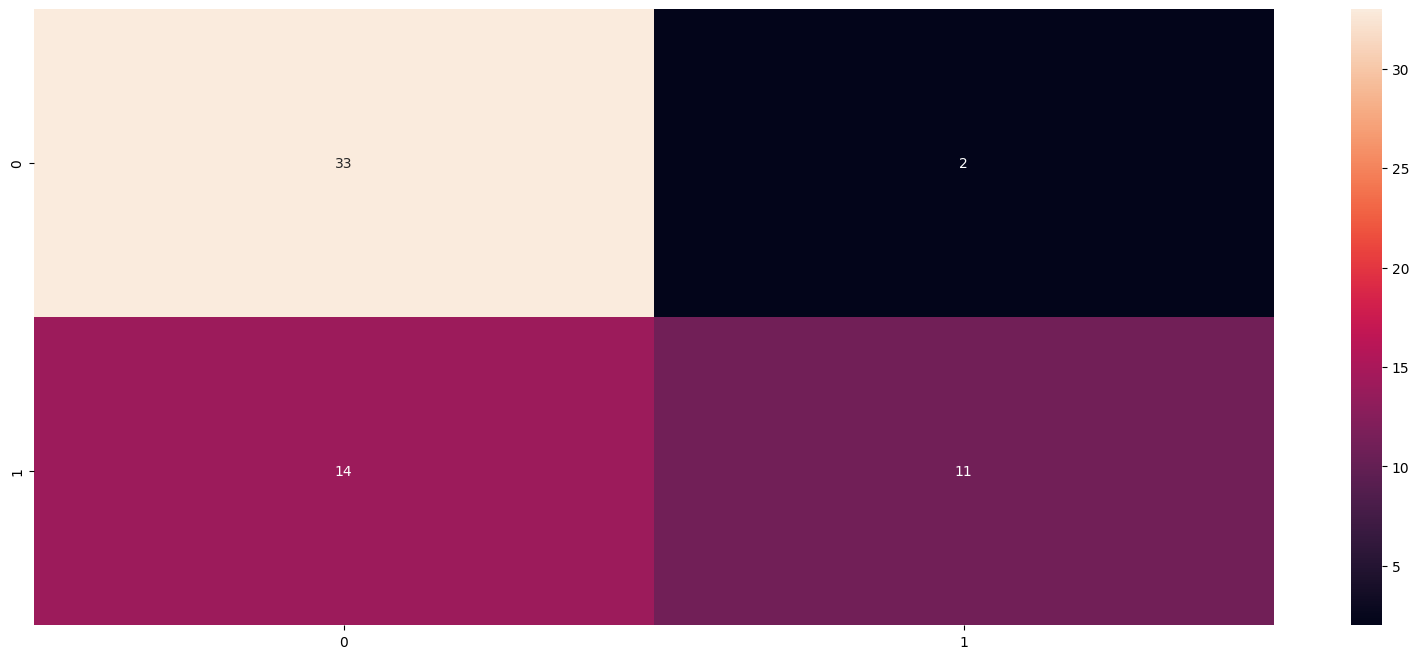

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier using GridSearchCV (gscv is assumed to be already defined)
gscv.fit(X_train, y_train)

# Predict on test set
y_pred_dt = gscv.predict(X_test)

# Calculate accuracy score
score_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Score: ", score_dt)

# Append score to method_scores if needed
method_scores.append(score_dt)

# Generate confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
sns.heatmap(cm_dt, annot=True, fmt="d")


Naive Bayes Score:  0.7333333333333333


<Axes: >

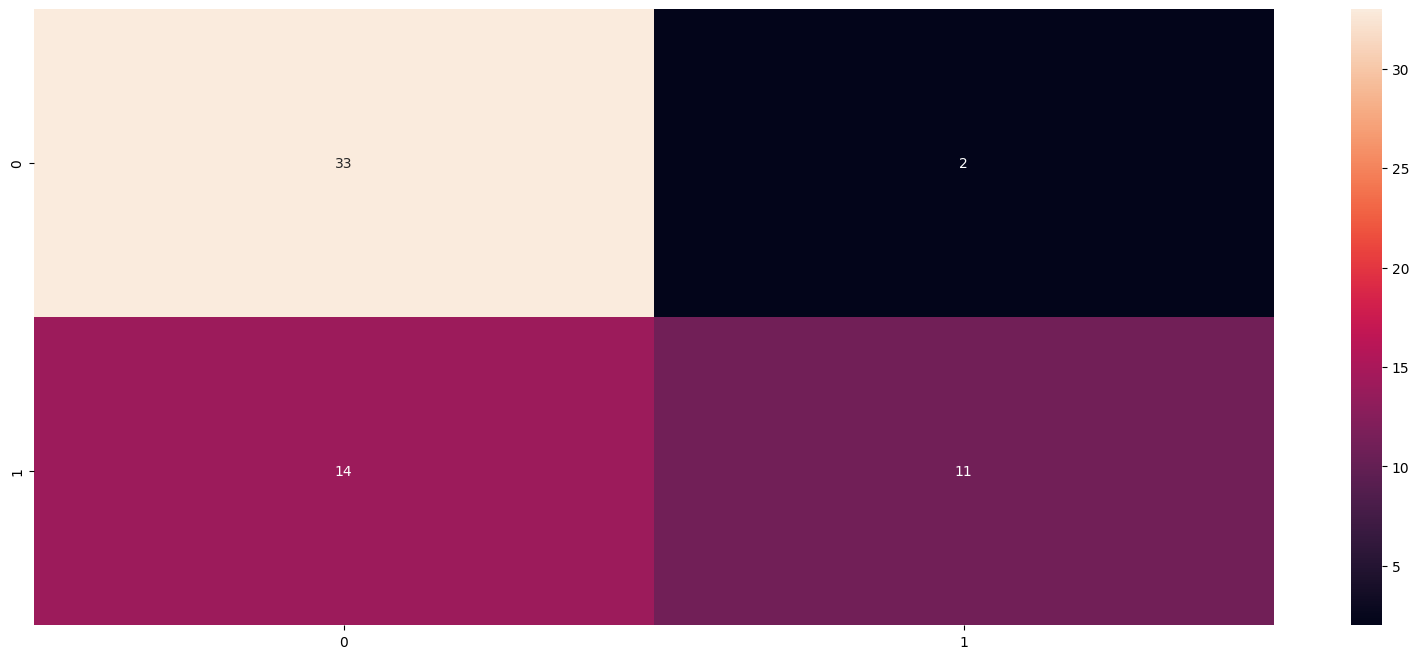

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize Naive Bayes Classifier
nb_classifier = GaussianNB()

# Train the classifier using GridSearchCV (gscv is assumed to be already defined)
gscv.fit(X_train, y_train)

# Predict on test set
y_pred_nb = gscv.predict(X_test)

# Calculate accuracy score
score_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Score: ", score_nb)

# Append score to method_scores if needed
method_scores.append(score_nb)

# Generate confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix
sns.heatmap(cm_nb, annot=True, fmt="d")


QDA Score:  0.75


<Axes: >

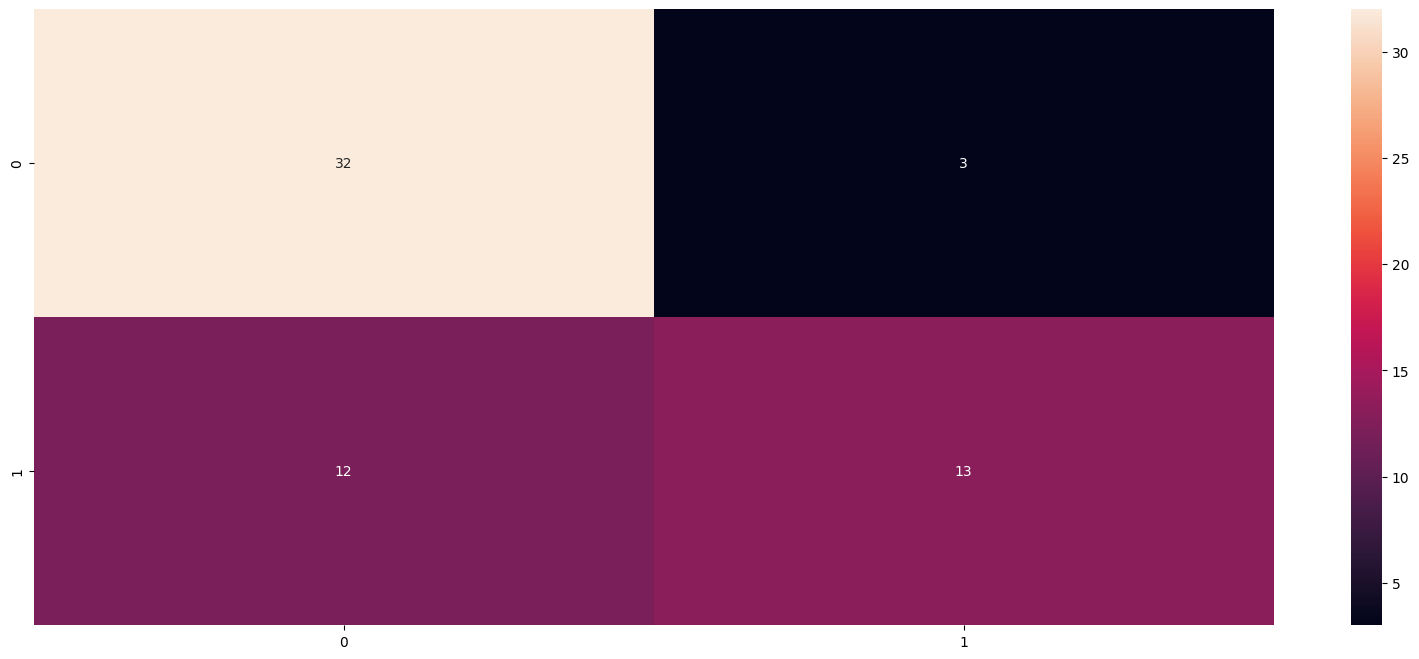

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Initialize QDA Classifier
qda_classifier = QuadraticDiscriminantAnalysis()

# Train the classifier using GridSearchCV (gscv is assumed to be already defined)
gscv.fit(X_train, y_train)

# Predict on test set
y_pred_qda = gscv.predict(X_test)

# Calculate accuracy score
score_qda = accuracy_score(y_test, y_pred_qda)
print("QDA Score: ", score_qda)

# Append score to method_scores if needed
method_scores.append(score_qda)

# Generate confusion matrix
cm_qda = confusion_matrix(y_test, y_pred_qda)

# Plot confusion matrix
sns.heatmap(cm_qda, annot=True, fmt="d")


# All the rest of works in differnet methods  ML model

## In this projects, I conducted an analysis  on four prominent Machine Learning algorithms, including Logistic Regression, Support Vector Machine, Random Forest, and Extra Trees Classifier. Various metrics, such as Precision, Recall, F1, Accuracy, and Overall Accuracy, were employed to compare the impact of using techniques like both with and without SMOTE and ADASYN on model performance, Hyperparameter Optimization.

## When I Compared between Adaysn, Hyperparameter, Smote, and no smote,hyperparameter Optimization techniques performed better accuracy, precision, and OA. It is important to note that while the NO SMOTE approach appears to outperform ADASYN and SMOTE, a comprehensive investigation revealed that Hyperparameter Optimization using SVM yields the highest level of accuracy among these methods.

##  My findings indicate that the use of hyperparameter optimization is the most effective approach for improving the accuracy of my model. In addition to its superior performance, hyperparameter optimization offers greater flexibility and adaptability to various data sets, leading to more reliable and consistent results.

In [ ]:
!pip install colorama

In [ ]:
import warnings
import matplotlib.pyplot as plt
import warnings
import seaborn as sns


In [ ]:

from colorama import Fore, Back, Style
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj

init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

%matplotlib inline

import xgboost
import lightgbm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
!pip install  catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBRFClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.decomposition import PCA
from lightgbm import  LGBMClassifier
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Load the clinical data
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Prepare the data
Features = ['time', 'ejection_fraction', 'serum_creatinine']
X = data[Features]
y = data["DEATH_EVENT"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classifiers
classifiers = {
    "SVM": SVC(random_state=2),
    "LR": LogisticRegression(random_state=2),
    "RF": RandomForestClassifier(random_state=2),
    "ETC": ExtraTreesClassifier(random_state=2),
    "XGBRF": XGBRFClassifier(random_state=2),
    "GB": GradientBoostingClassifier(random_state=2),
    #'CatBoost': CatBoostClassifier(random_state=2)
    #'LightGBM': lightgbm.LGBMClassifier(random_state=2),
    'XGBoost': xgboost.XGBClassifier(random_state=2)
}

# Define parameter grids for hyperparameter tuning
param_grids = {
    "SVM": {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'rbf']},
    "LR": {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
    "RF": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    "ETC": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    "XGBRF": {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
    "GB": {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]},
   # 'LightGBM': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}
}
pca = PCA(n_components=2)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define oversampling techniques
sampling_techniques = {"SMOTE": SMOTE(), "ADASYN": ADASYN() }

# Perform hyperparameter tuning and evaluation
results = {}
for classifier_name, classifier in classifiers.items():
    results[classifier_name] = {}
    for sampling_name, sampler in sampling_techniques.items():
        X_resampled, y_resampled = sampler.fit_resample(X_train_scaled, y_train)
        clf = GridSearchCV(classifier, param_grids[classifier_name], cv=5)
        clf.fit(X_resampled, y_resampled)
        y_pred = clf.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        results[classifier_name][sampling_name] = {
            "best_params": clf.best_params_,
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1
        }

        # Include hyperparameter-tuned model for comparison
        results[classifier_name]["HyperparameterTuned"] = {
            "best_params": clf.best_params_,
            "accuracy": clf.best_score_,
            "precision": precision_score(y_test, clf.predict(X_test_scaled)),
            "recall": recall_score(y_test, clf.predict(X_test_scaled)),
            "f1": f1_score(y_test, clf.predict(X_test_scaled))
        }

# Print results
for classifier_name, classifier_results in results.items():
    print(f"\n{classifier_name}:")
    for sampling_name, result in classifier_results.items():
        print(f"{sampling_name}:")
        print(f" Best Parameters: {result['best_params']}")
        print(f" Accuracy: {result['accuracy']:.4f}")
        print(f" Precision: {result['precision']:.4f}")
        print(f" Recall: {result['recall']:.4f}")
        print(f" F1 Score: {result['f1']:.4f}")




SVM:
SMOTE:
 Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
 Accuracy: 0.8667
 Precision: 0.7368
 Recall: 0.8235
 F1 Score: 0.7778
HyperparameterTuned:
 Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
 Accuracy: 0.8099
 Precision: 0.6071
 Recall: 1.0000
 F1 Score: 0.7556
ADASYN:
 Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
 Accuracy: 0.8167
 Precision: 0.6071
 Recall: 1.0000
 F1 Score: 0.7556

LR:
SMOTE:
 Best Parameters: {'C': 0.1, 'penalty': 'l2'}
 Accuracy: 0.7500
 Precision: 0.5385
 Recall: 0.8235
 F1 Score: 0.6512
HyperparameterTuned:
 Best Parameters: {'C': 1, 'penalty': 'l2'}
 Accuracy: 0.7407
 Precision: 0.5161
 Recall: 0.9412
 F1 Score: 0.6667
ADASYN:
 Best Parameters: {'C': 1, 'penalty': 'l2'}
 Accuracy: 0.7333
 Precision: 0.5161
 Recall: 0.9412
 F1 Score: 0.6667

RF:
SMOTE:
 Best Parameters: {'max_depth': 10, 'n_estimators': 50}
 Accuracy: 0.9000
 Precision: 0.8667
 Recall: 0.7647
 F1 Score: 0.8125
HyperparameterTuned:
 Best Parameters: 

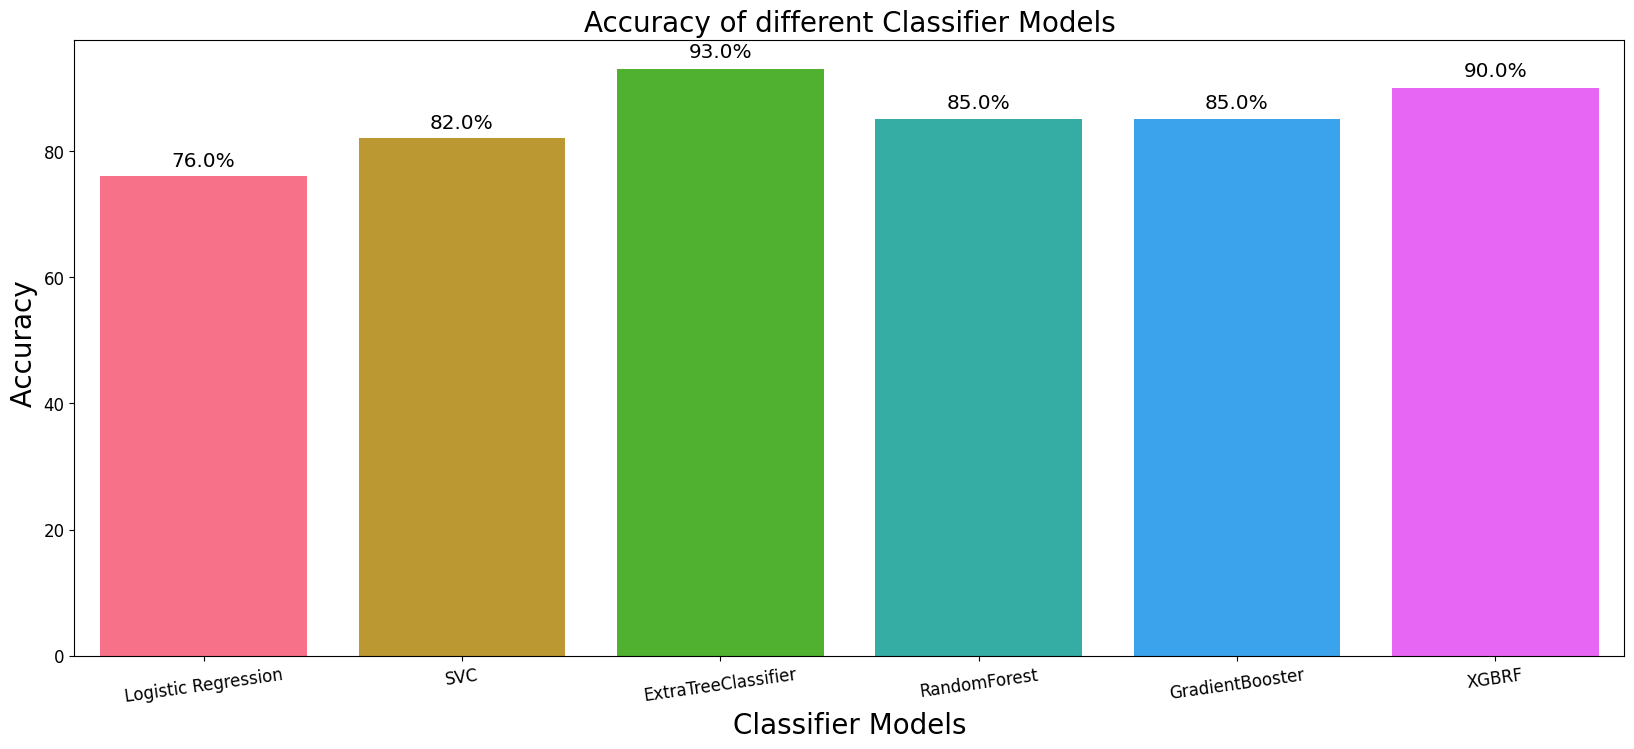

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

model_list = ['Logistic Regression', 'SVC', 'ExtraTreeClassifier', 'RandomForest', 'GradientBooster', 'XGBRF']
accuracy_list = [76, 82, 93, 85, 85, 90]  # Example accuracy values

plt.rcParams['figure.figsize'] = 20, 8
plt.grid(False)

if len(model_list) == len(accuracy_list):
    ax = sns.barplot(x=model_list, y=accuracy_list, palette="husl", saturation=1.0)
    plt.xlabel('Classifier Models', fontsize=20)
    plt.ylabel(' Accuracy', fontsize=20)
    plt.title('Accuracy of different Classifier Models', fontsize=20)
    plt.xticks(fontsize=12, horizontalalignment='center', rotation=8)
    plt.yticks(fontsize=12)

    for i in ax.patches:
        width, height = i.get_width(), i.get_height()
        x, y = i.get_xy()
        ax.annotate(f'{round(height, 2)}%', (x + width/2, y + height*1.02), ha='center', fontsize='x-large')

    plt.show()
else:
    print("Error: The model_list and accuracy_list arrays must be of the same length.")


<Figure size 1400x1000 with 0 Axes>

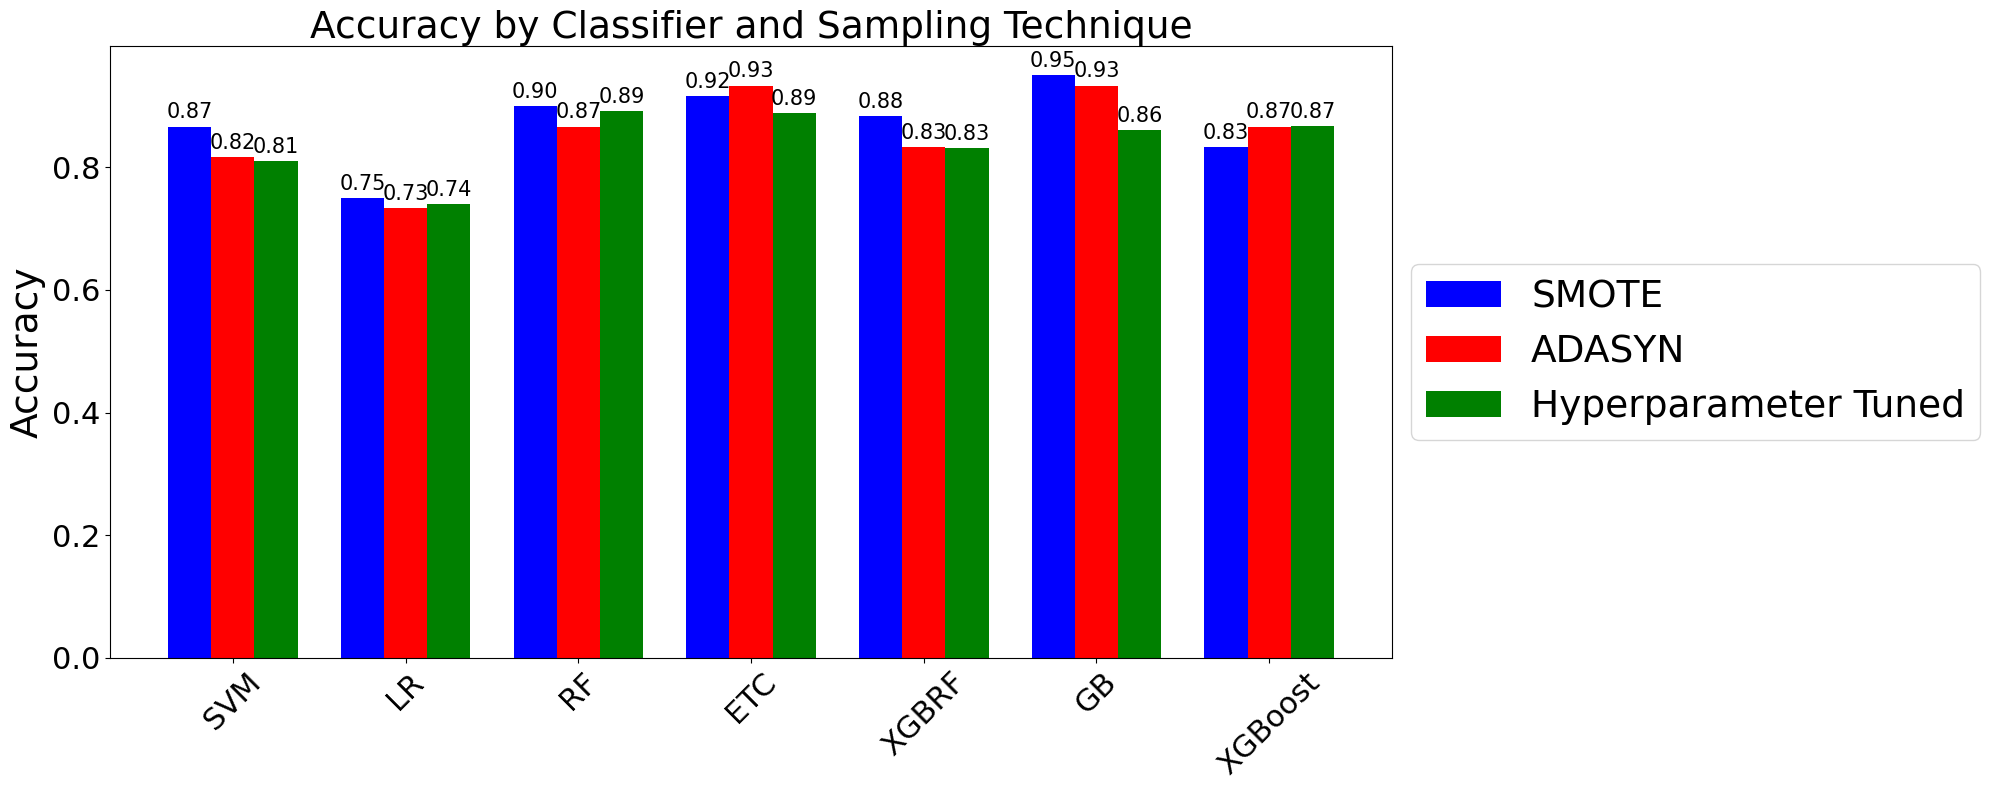

In [ ]:
# Visualize results with added styling

plt.figure(figsize=(14, 10))
labels = list(results.keys())
smote_accuracies = [results[classifier]["SMOTE"]["accuracy"] for classifier in labels]
adasyn_accuracies = [results[classifier]["ADASYN"]["accuracy"] for classifier in labels]
hyperparam_accuracies = [results[classifier]["HyperparameterTuned"]["accuracy"] for classifier in labels]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
bar_width = 0.25
bar_positions = np.arange(len(labels))

bar1 = ax.bar(bar_positions - bar_width, smote_accuracies, bar_width, color='blue', label='SMOTE')
bar2 = ax.bar(bar_positions, adasyn_accuracies, bar_width, color='red', label='ADASYN')
bar3 = ax.bar(bar_positions + bar_width, hyperparam_accuracies, bar_width, color='green', label='Hyperparameter Tuned')

ax.set_ylabel('Accuracy',fontsize=27)
ax.set_title('Accuracy by Classifier and Sampling Technique',fontsize=27)
ax.set_xticks(bar_positions)
ax.set_xticklabels(labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=27)
plt.xticks(bar_positions, labels, rotation=45)
# Rounding the bar labels to two decimal places and displaying as percentages
ax.bar_label(bar1, padding=3, fmt='%.2f', fontsize=15)
ax.bar_label(bar2, padding=3, fmt='%.2f', fontsize=15)
ax.bar_label(bar3, padding=3, fmt='%.2f', fontsize=15)
plt.rc('xtick',labelsize=22)
plt.rc('ytick',labelsize=22)

plt.tight_layout()
plt.show()

<Figure size 1400x1000 with 0 Axes>

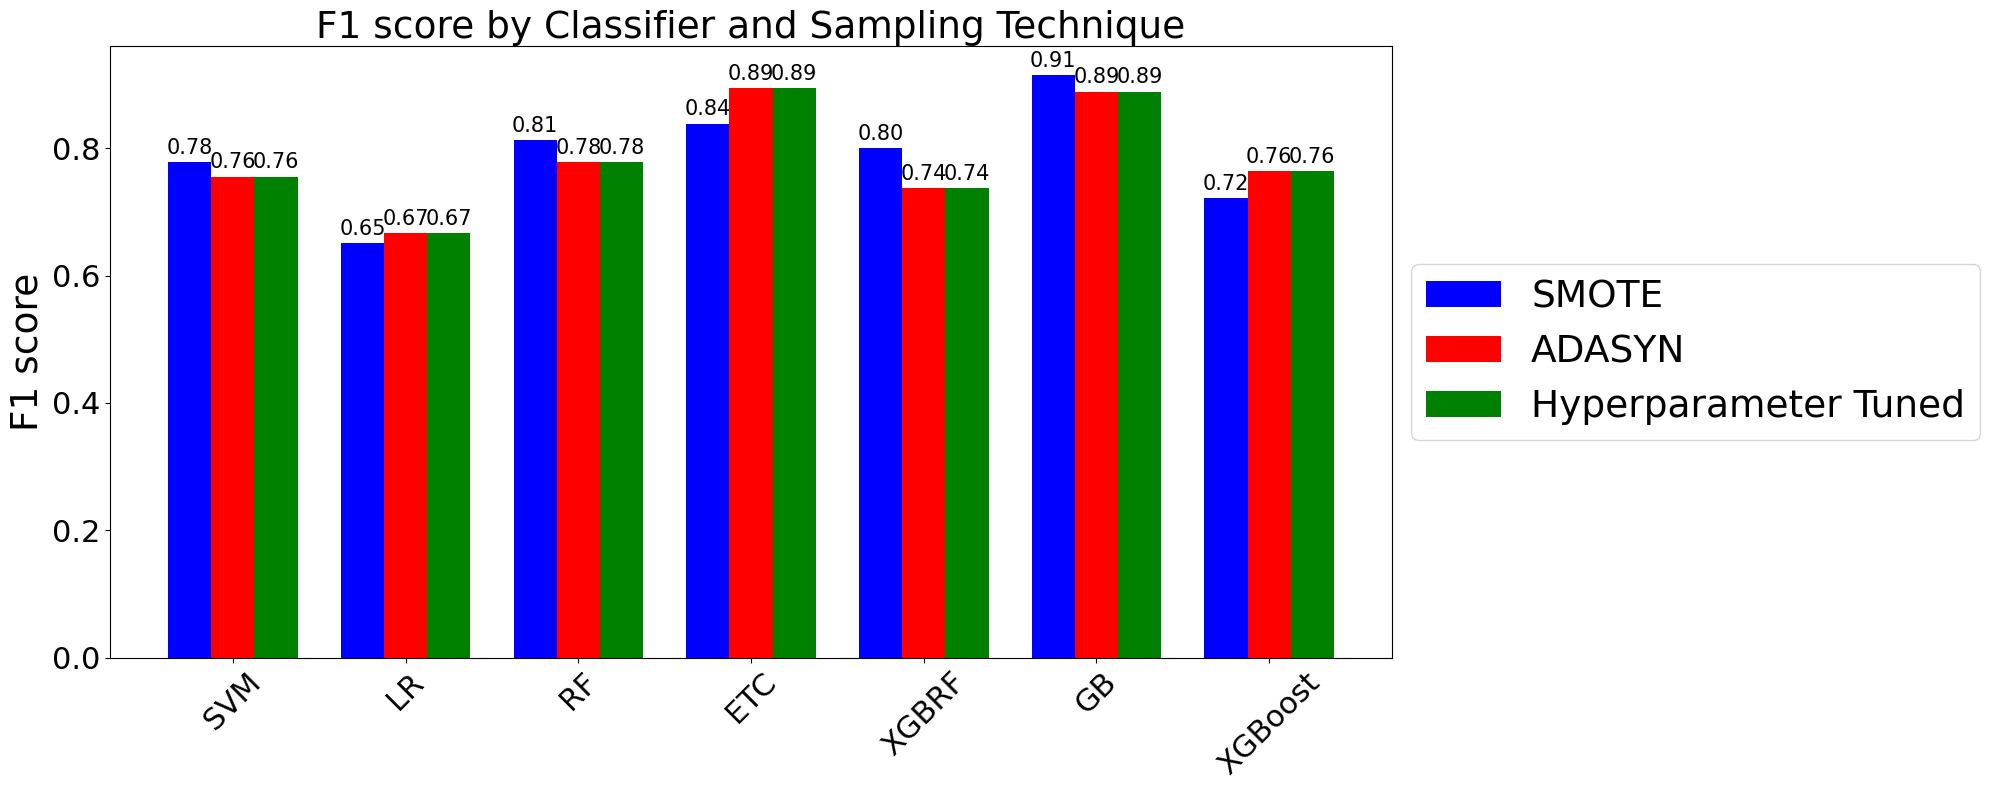

In [ ]:


# Visualize results with added styling
plt.figure(figsize=(14, 10))
labels = list(results.keys())
smote_accuracies = [results[classifier]["SMOTE"]["f1"] for classifier in labels]
adasyn_accuracies = [results[classifier]["ADASYN"]["f1"] for classifier in labels]
hyperparam_accuracies = [results[classifier]["HyperparameterTuned"]["f1"] for classifier in labels]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
bar_width = 0.25
bar_positions = np.arange(len(labels))

bar1 = ax.bar(bar_positions - bar_width, smote_accuracies, bar_width, color='blue', label='SMOTE')
bar2 = ax.bar(bar_positions, adasyn_accuracies, bar_width, color='red', label='ADASYN')
bar3 = ax.bar(bar_positions + bar_width, hyperparam_accuracies, bar_width, color='green', label='Hyperparameter Tuned')

ax.set_ylabel('F1 score',fontsize=27)
ax.set_title('F1 score by Classifier and Sampling Technique',fontsize=27)
ax.set_xticks(bar_positions)
ax.set_xticklabels(labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=27)
plt.xticks(bar_positions, labels, rotation=45)
# Rounding the bar labels to two decimal places and displaying as percentages
ax.bar_label(bar1, padding=3, fmt='%.2f', fontsize=15)
ax.bar_label(bar2, padding=3, fmt='%.2f', fontsize=15)
ax.bar_label(bar3, padding=3, fmt='%.2f', fontsize=15)
plt.rc('xtick',labelsize=22)
plt.rc('ytick',labelsize=22)

plt.tight_layout()
plt.show()

<Figure size 1400x1000 with 0 Axes>

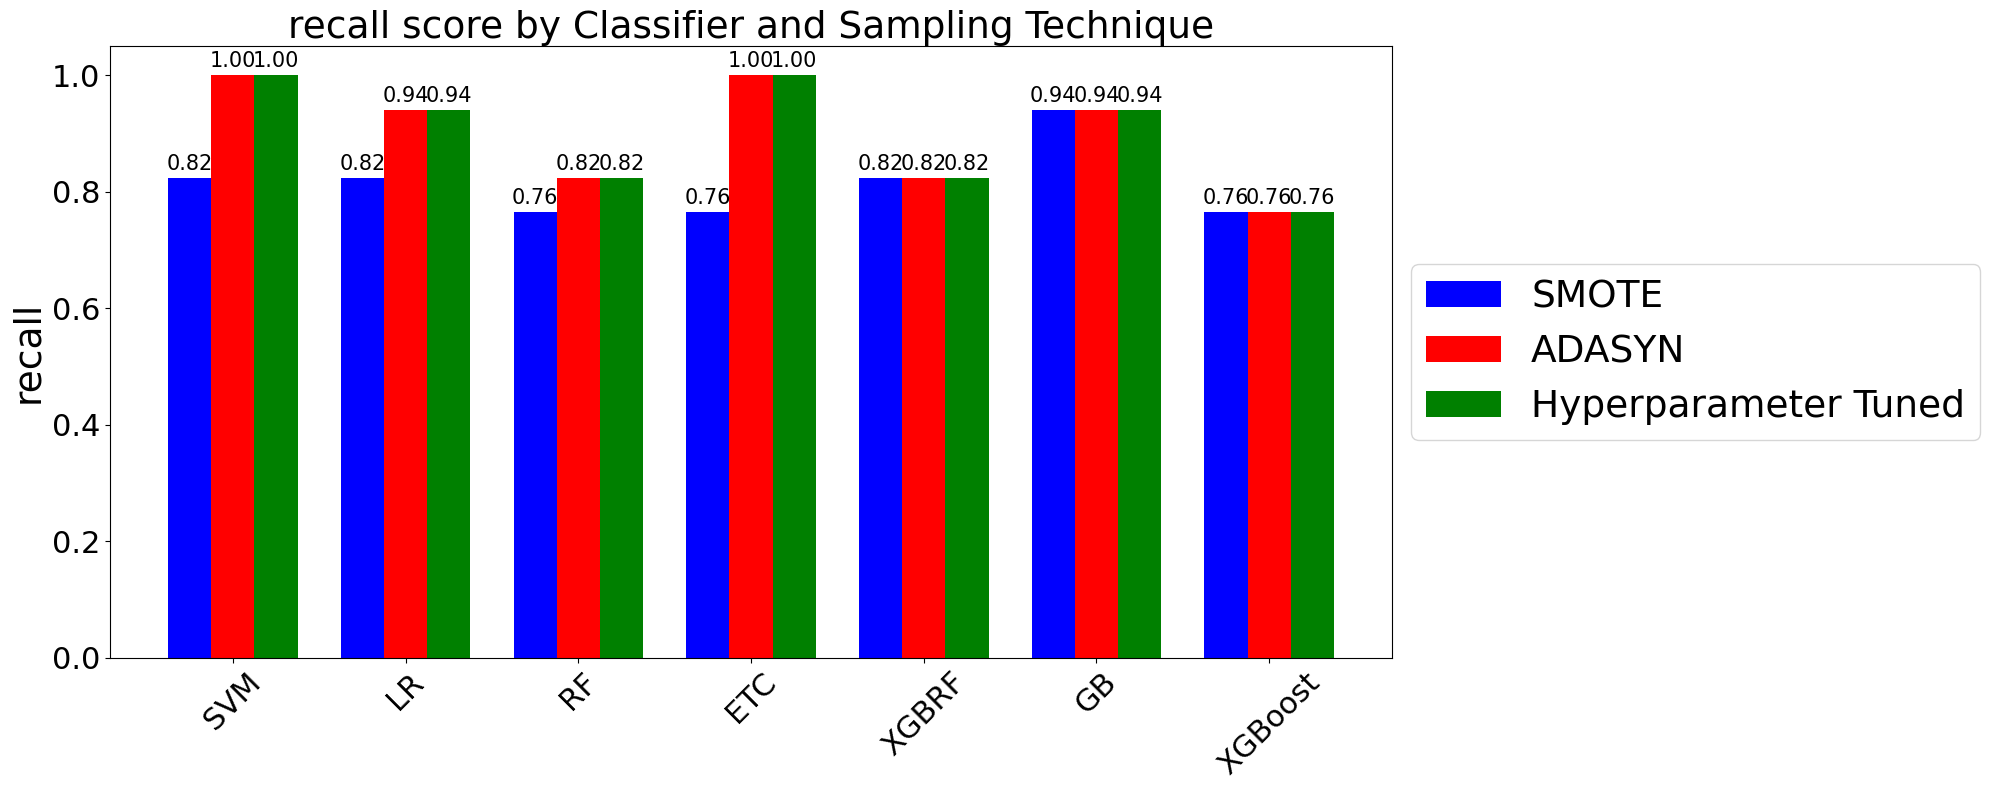

In [ ]:



# Visualize results with added styling
plt.figure(figsize=(14, 10))
labels = list(results.keys())
smote_accuracies = [results[classifier]["SMOTE"]["recall"] for classifier in labels]
adasyn_accuracies = [results[classifier]["ADASYN"]["recall"] for classifier in labels]
hyperparam_accuracies = [results[classifier]["HyperparameterTuned"]["recall"] for classifier in labels]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
bar_width = 0.25
bar_positions = np.arange(len(labels))

bar1 = ax.bar(bar_positions - bar_width, smote_accuracies, bar_width, color='blue', label='SMOTE')
bar2 = ax.bar(bar_positions, adasyn_accuracies, bar_width, color='red', label='ADASYN')
bar3 = ax.bar(bar_positions + bar_width, hyperparam_accuracies, bar_width, color='green', label='Hyperparameter Tuned')

ax.set_ylabel('recall',fontsize=27)
ax.set_title('recall score by Classifier and Sampling Technique',fontsize=27)
ax.set_xticks(bar_positions)
ax.set_xticklabels(labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=27)
plt.xticks(bar_positions, labels, rotation=45)
# Rounding the bar labels to two decimal places and displaying as percentages
ax.bar_label(bar1, padding=3, fmt='%.2f', fontsize=15)
ax.bar_label(bar2, padding=3, fmt='%.2f', fontsize=15)
ax.bar_label(bar3, padding=3, fmt='%.2f', fontsize=15)
plt.rc('xtick',labelsize=22)
plt.rc('ytick',labelsize=22)

plt.tight_layout()
plt.show()




<Figure size 1400x1000 with 0 Axes>

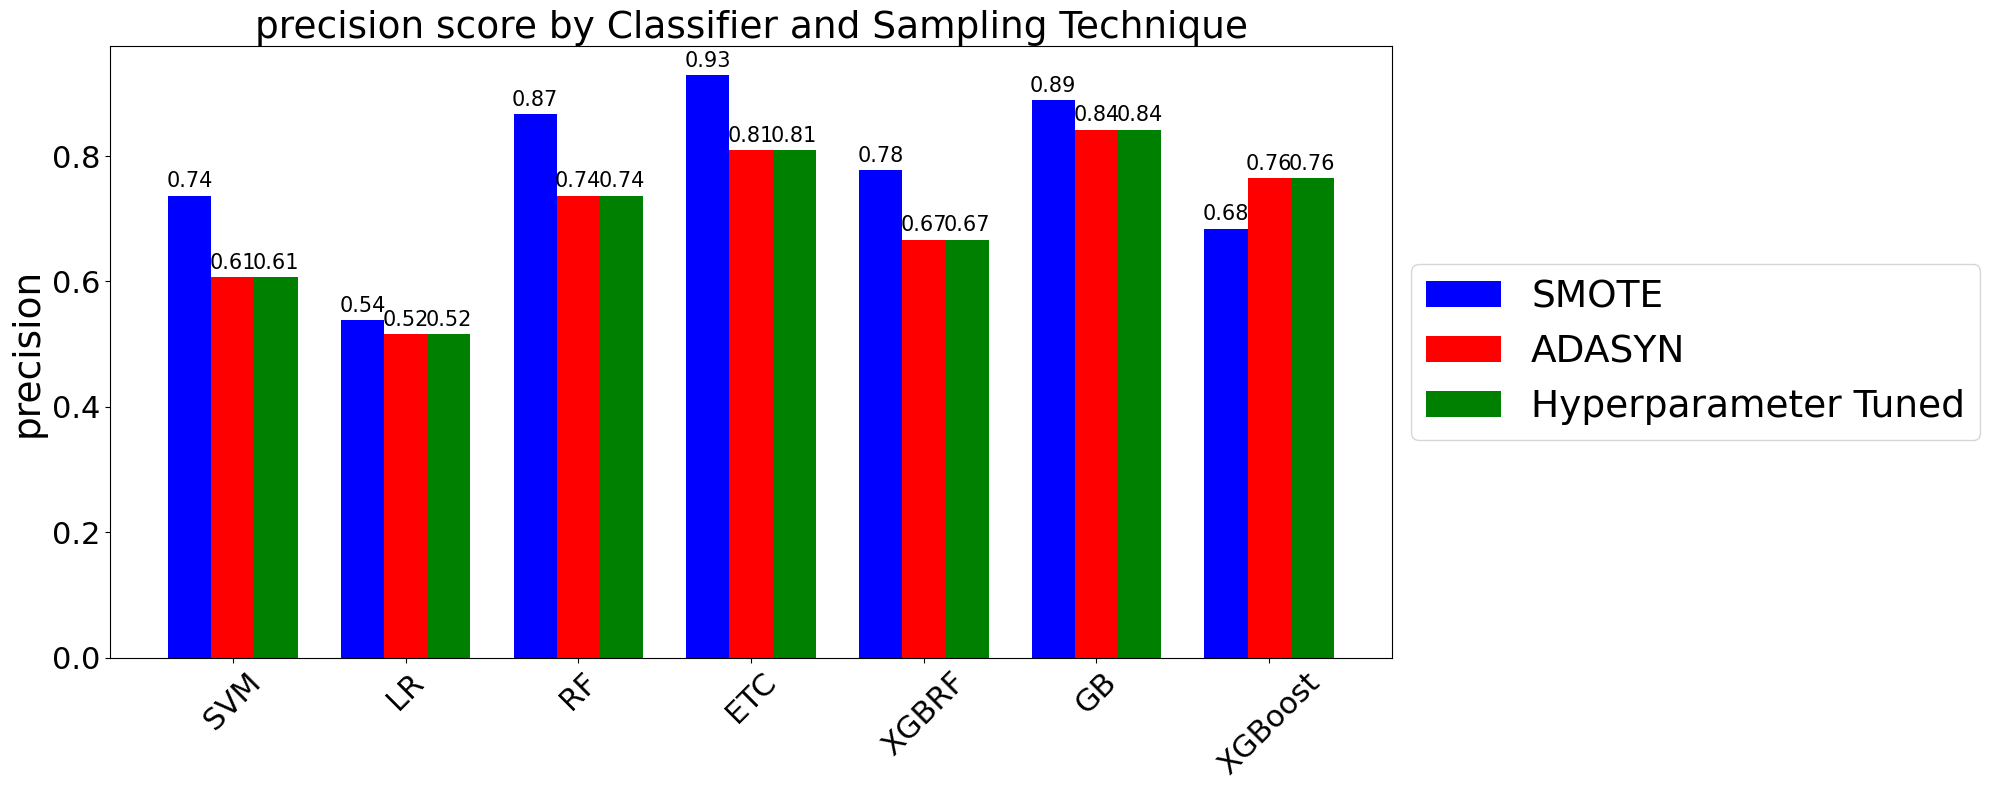

In [ ]:



# Visualize results with added styling
plt.figure(figsize=(14, 10))
labels = list(results.keys())
smote_accuracies = [results[classifier]["SMOTE"]["precision"] for classifier in labels]
adasyn_accuracies = [results[classifier]["ADASYN"]["precision"] for classifier in labels]
hyperparam_accuracies = [results[classifier]["HyperparameterTuned"]["precision"] for classifier in labels]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
bar_width = 0.25
bar_positions = np.arange(len(labels))

bar1 = ax.bar(bar_positions - bar_width, smote_accuracies, bar_width, color='blue', label='SMOTE')
bar2 = ax.bar(bar_positions, adasyn_accuracies, bar_width, color='red', label='ADASYN')
bar3 = ax.bar(bar_positions + bar_width, hyperparam_accuracies, bar_width, color='green', label='Hyperparameter Tuned')

ax.set_ylabel('precision',fontsize=27)
ax.set_title('precision score by Classifier and Sampling Technique',fontsize=27)
ax.set_xticks(bar_positions)
ax.set_xticklabels(labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=27)
plt.xticks(bar_positions, labels, rotation=45)
# Rounding the bar labels to two decimal places and displaying as percentages
ax.bar_label(bar1, padding=3, fmt='%.2f', fontsize=15)
ax.bar_label(bar2, padding=3, fmt='%.2f', fontsize=15)
ax.bar_label(bar3, padding=3, fmt='%.2f', fontsize=15)
plt.rc('xtick',labelsize=22)
plt.rc('ytick',labelsize=22)


plt.tight_layout()
plt.show()

















<Figure size 1400x1000 with 0 Axes>

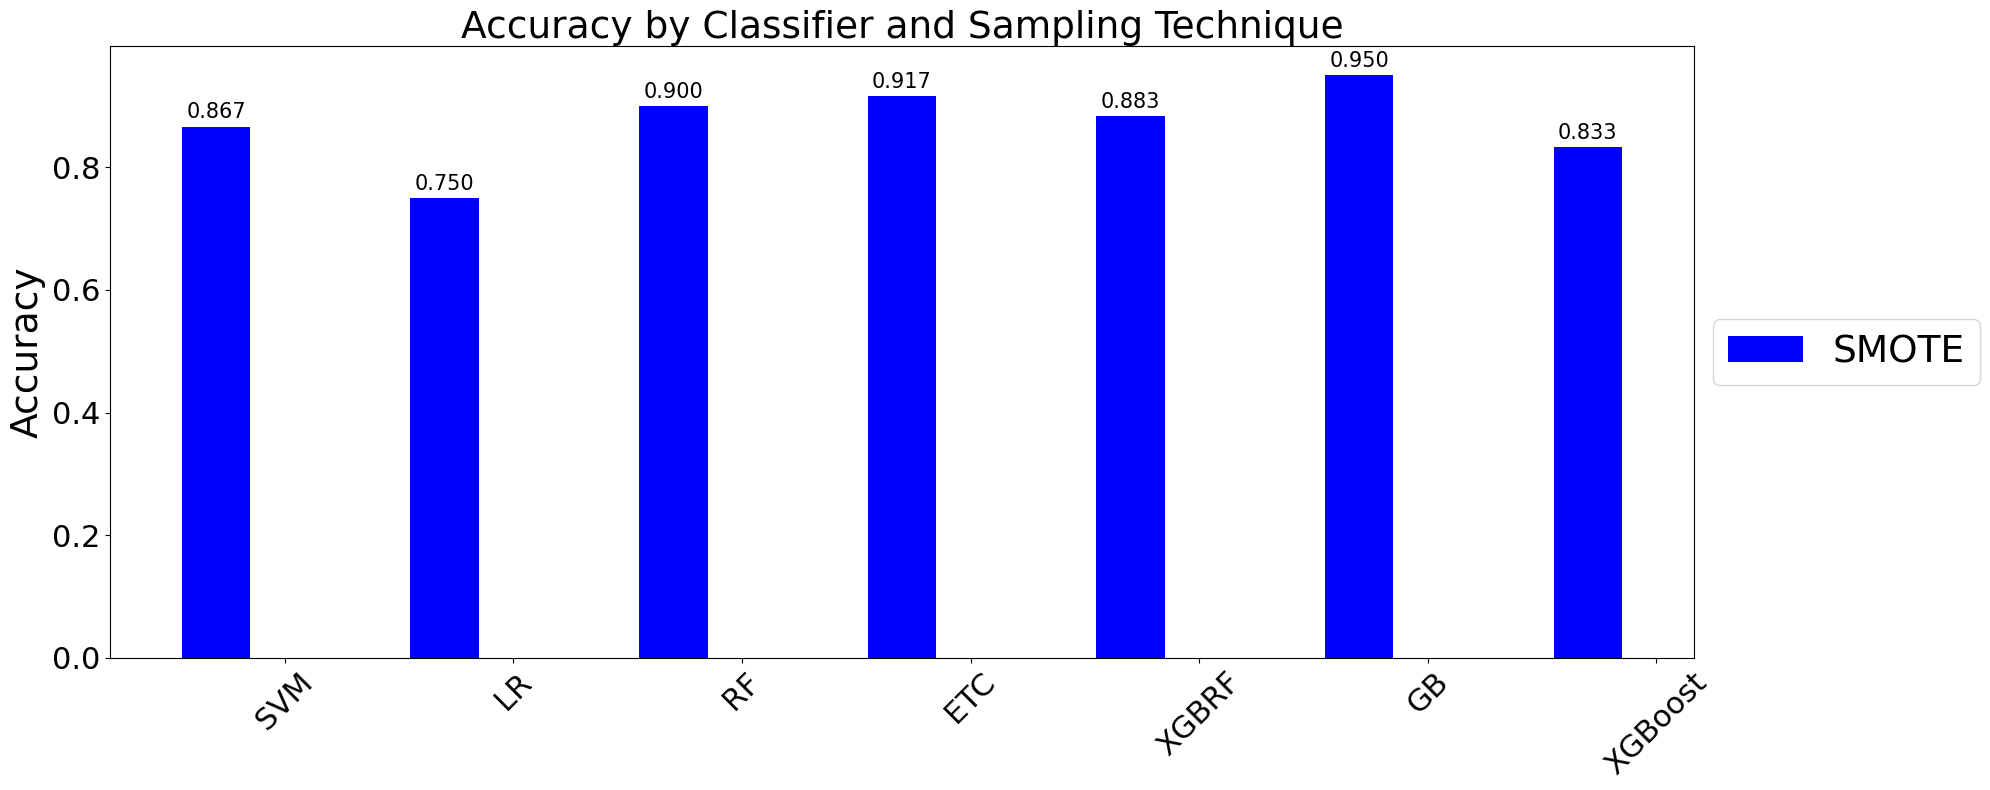

In [ ]:
# Visualize results with added styling
plt.figure(figsize=(14, 10))
labels = list(results.keys())
smote_accuracies = [results[classifier]["SMOTE"]["accuracy"] for classifier in labels ]
adasyn_accuracies = [results[classifier]["ADASYN"]["accuracy"] for classifier in labels]
hyperparam_accuracies = [results[classifier]["HyperparameterTuned"]["accuracy"] for classifier in labels]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
bar_width = 0.3
bar_positions = np.arange(len(labels))

bar1 = ax.bar(bar_positions - bar_width, smote_accuracies, bar_width, color='blue', label='SMOTE')
#bar2 = ax.bar(bar_positions, adasyn_accuracies, bar_width, color='lightcoral', label='ADASYN')
#bar3 = ax.bar(bar_positions + bar_width, hyperparam_accuracies, bar_width, color='lightgreen', label='Hyperparameter Tuned')

ax.set_ylabel('Accuracy',fontsize=27)
ax.set_title('Accuracy by Classifier and Sampling Technique',fontsize=27)
ax.set_xticks(bar_positions)
ax.set_xticklabels(labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=27)
plt.xticks(bar_positions, labels, rotation=45)
# Rounding the bar labels to two decimal places and displaying as percentages
ax.bar_label(bar1, padding=3, fmt='%.3f', fontsize=15)
#ax.bar_label(bar2, padding=3, fmt='%.2f%%')
#ax.bar_label(bar3, padding=3, fmt='%.2f%%')

plt.tight_layout()
plt.show()

<Figure size 1400x1000 with 0 Axes>

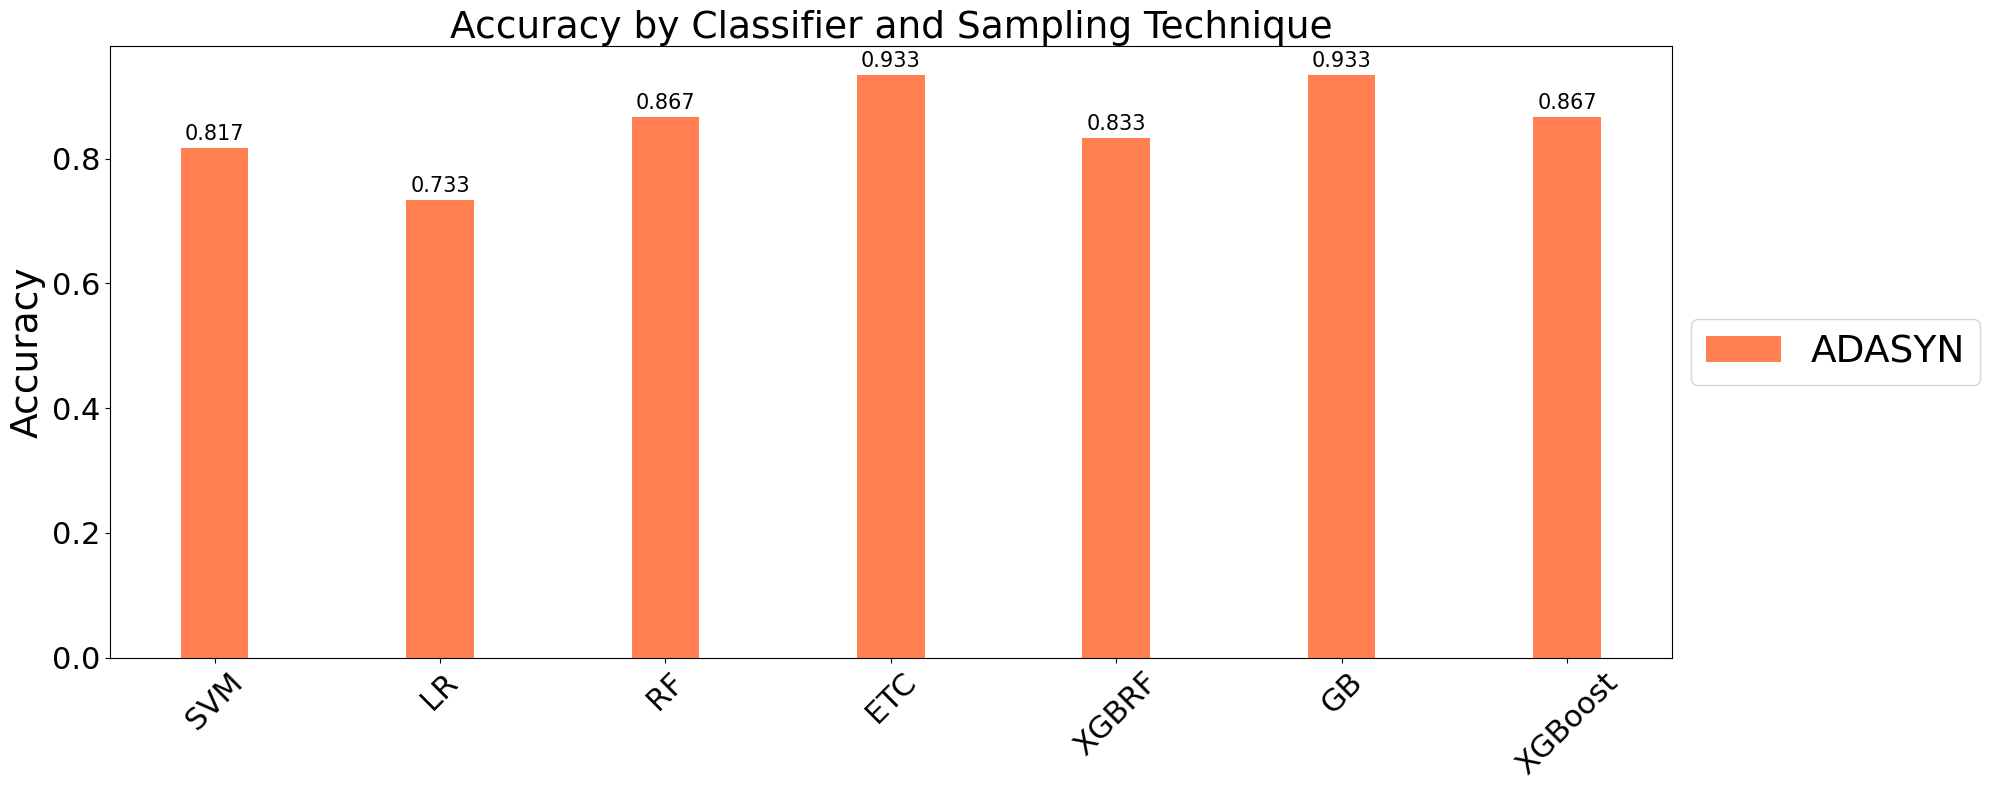

In [ ]:
# Visualize results with added styling
plt.figure(figsize=(14, 10))
labels = list(results.keys())
smote_accuracies = [results[classifier]["SMOTE"]["accuracy"] for classifier in labels]
adasyn_accuracies = [results[classifier]["ADASYN"]["accuracy"] for classifier in labels]
hyperparam_accuracies = [results[classifier]["HyperparameterTuned"]["accuracy"] for classifier in labels]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
bar_width = 0.3
bar_positions = np.arange(len(labels))

#bar1 = ax.bar(bar_positions - bar_width, smote_accuracies, bar_width, color='skyblue', label='SMOTE')
bar2 = ax.bar(bar_positions, adasyn_accuracies, bar_width, color='coral', label='ADASYN')
#bar3 = ax.bar(bar_positions + bar_width, hyperparam_accuracies, bar_width, color='lightgreen', label='Hyperparameter Tuned')

ax.set_ylabel('Accuracy',fontsize=27)
ax.set_title('Accuracy by Classifier and Sampling Technique',fontsize=27)
ax.set_xticks(bar_positions)
ax.set_xticklabels(labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=27)
plt.xticks(bar_positions, labels, rotation=45)
# Rounding the bar labels to two decimal places and displaying as percentages
#ax.bar_label(bar1, padding=3, fmt='%.2f%%')
ax.bar_label(bar2, padding=3, fmt='%.3f',fontsize=15)
#ax.bar_label(bar3, padding=3, fmt='%.2f')

plt.tight_layout()
plt.show()

# CNN

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.6405 - loss: 0.6854 - val_accuracy: 0.0000e+00 - val_loss: 0.7461
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6589 - loss: 0.6604 - val_accuracy: 0.1194 - val_loss: 0.7597
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6785 - loss: 0.6314 - val_accuracy: 0.2836 - val_loss: 0.7605
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7290 - loss: 0.6072 - val_accuracy: 0.2836 - val_loss: 0.7703
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7243 - loss: 0.5957 - val_accuracy: 0.3134 - val_loss: 0.7709
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7467 - loss: 0.5598 - val_accuracy: 0.3881 - val_loss: 0.7866
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7701 - loss: 0.5410 - val_accuracy: 0.4478 - val_loss: 0.7890
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7815 - loss: 0.5131 - val_accuracy: 0.5075 - val_l

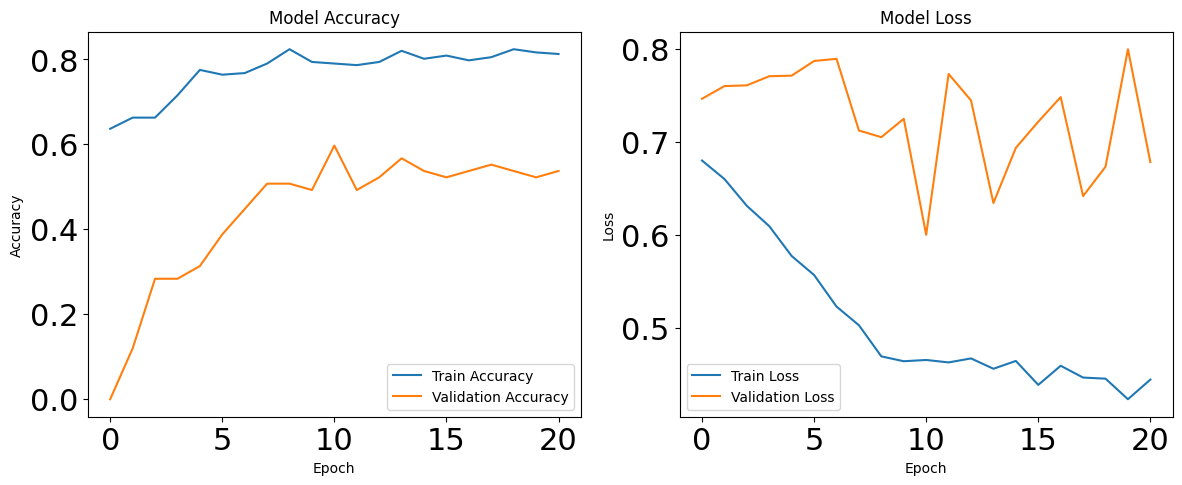

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
CNN Model Performance on Test Data:
Accuracy: 0.8667
Precision: 0.7619
Recall: 0.8421
F1 Score: 0.8000

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        41
           1       0.76      0.84      0.80        19

    accuracy                           0.87        60
   macro avg       0.84      0.86      0.85        60
weighted avg       0.87      0.87      0.87        60



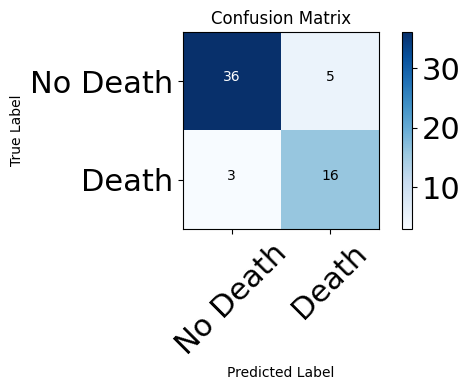

In [ ]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load the Clinical Data
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Prepare the Data
Features = ['time', 'ejection_fraction', 'serum_creatinine']
X = data[Features]
y = data["DEATH_EVENT"]

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

# Standardize the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Handle Class Imbalance using ADASYN (You can switch to SMOTE if preferred)
sampler = ADASYN(random_state=2)
X_resampled, y_resampled = sampler.fit_resample(X_train_pca, y_train)

# Reshape Data for CNN (Adding an extra dimension)
X_resampled_cnn = X_resampled.reshape((X_resampled.shape[0], X_resampled.shape[1], 1))
X_test_cnn = X_test_pca.reshape((X_test_pca.shape[0], X_test_pca.shape[1], 1))

# Define the CNN Model
# Define the CNN Model
# Define the CNN Model
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=input_shape,padding='same')) # Added padding
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu',padding='same'))


    # Added padding
    # Removed the second MaxPooling1D layer as it was causing the error
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))


    # Compile the Model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the CNN Model
input_shape = (X_resampled_cnn.shape[1], X_resampled_cnn.shape[2])
cnn_model = create_cnn_model(input_shape)

# Define Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the Model
history = cnn_model.fit(
    X_resampled_cnn,
    y_resampled,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Plot Training & Validation Accuracy and Loss
plt.figure(figsize=(14,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the Model on Test Data
y_pred_prob = cnn_model.predict(X_test_cnn)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("CNN Model Performance on Test Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Death', 'Death'], rotation=45)
plt.yticks(tick_marks, ['No Death', 'Death'])

# Annotate the Confusion Matrix
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


# CNN

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 531ms/step - accuracy: 0.4539 - loss: 0.6916 - val_accuracy: 0.7164 - val_loss: 0.6702
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7324 - loss: 0.6780 - val_accuracy: 0.6567 - val_loss: 0.6666
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7753 - loss: 0.6686 - val_accuracy: 0.5970 - val_loss: 0.6621
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7656 - loss: 0.6572 - val_accuracy: 0.5970 - val_loss: 0.6584
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8030 - loss: 0.6435 - val_accuracy: 0.5821 - val_loss: 0.6634
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8059 - loss: 0.6217 - val_accuracy: 0.5821 - val_loss: 0.6637
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8300 - loss: 0.6020 - val_accuracy: 0.5821 - val_loss: 0.6436
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8050 - loss: 0.5796 - val_accuracy: 0.6418 - val_loss

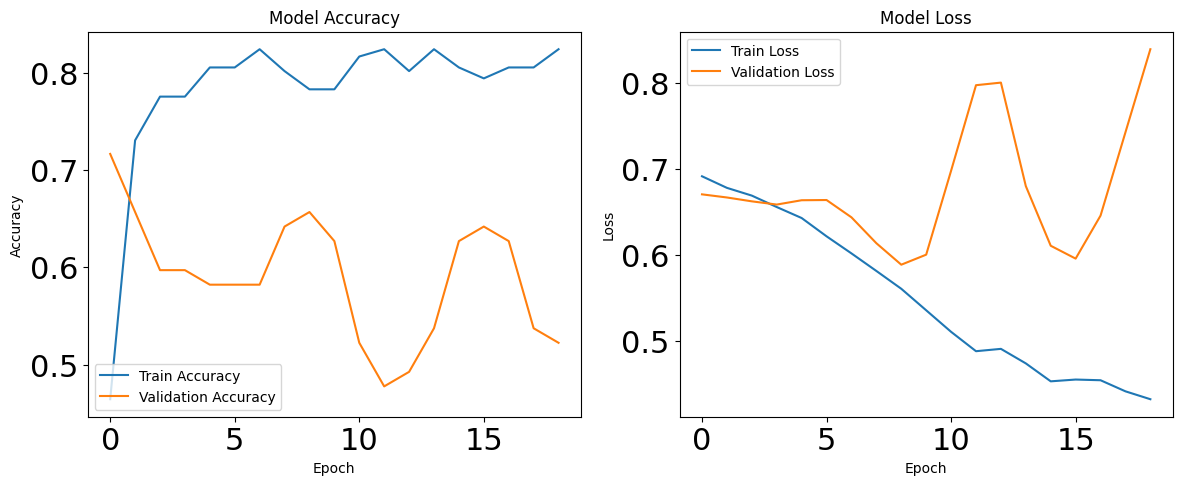

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
CNN Model Performance on Test Data:
Accuracy: 0.8667
Precision: 0.7391
Recall: 0.8947
F1 Score: 0.8095

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90        41
           1       0.74      0.89      0.81        19

    accuracy                           0.87        60
   macro avg       0.84      0.87      0.85        60
weighted avg       0.88      0.87      0.87        60



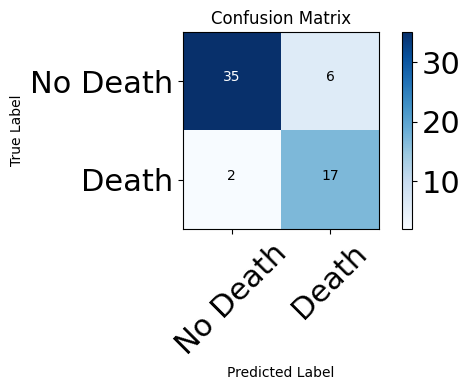

In [ ]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load the Clinical Data
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Prepare the Data
Features = ['time', 'ejection_fraction', 'serum_creatinine']
X = data[Features]
y = data["DEATH_EVENT"]

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

# Standardize the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Added the missing (X_test) argument


# Handle Class Imbalance using ADASYN (You can switch to SMOTE if preferred)
sampler = ADASYN(random_state=2)
X_resampled, y_resampled = sampler.fit_resample(X_train_pca, y_train)

# Reshape Data for CNN (Adding an extra dimension)
X_resampled_cnn = X_resampled.reshape((X_resampled.shape[0], X_resampled.shape[1], 1))
X_test_cnn = X_test_pca.reshape((X_test_pca.shape[0], X_test_pca.shape[1], 1))

# Define the CNN Model
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape,padding='same'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu',padding='same'))
    # Removed one MaxPooling1D layer to avoid negative dimension size
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu',padding='same'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the Model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the CNN Model
input_shape = (X_resampled_cnn.shape[1], X_resampled_cnn.shape[2])
cnn_model = create_cnn_model(input_shape)

# Define Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the Model
# Regenerate X_resampled_cnn and y_resampled to ensure consistency
X_resampled, y_resampled = sampler.fit_resample(X_train_pca, y_train)
X_resampled_cnn = X_resampled.reshape((X_resampled.shape[0], X_resampled.shape[1], 1)) # Added this line to regenerate X_resampled_cnn

history = cnn_model.fit(
    X_resampled_cnn,
    y_resampled,
    epochs=500,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)



# Plot Training & Validation Accuracy and Loss
plt.figure(figsize=(14,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the Model on Test Data
y_pred_prob = cnn_model.predict(X_test_cnn)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("CNN Model Performance on Test Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Death', 'Death'], rotation=45)
plt.yticks(tick_marks, ['No Death', 'Death'])

# Annotate the Confusion Matrix
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBRFClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score

# Load the data
def load_data(file_path):
    return pd.read_csv(file_path)

# Preprocess the data
def preprocess_data(data):
    features = data[['time', 'ejection_fraction', 'serum_creatinine']]
    target = data['DEATH_EVENT']
    return features, target

# Split the data into training and testing sets
def split_data(features, target):
    return train_test_split(features, target, test_size=0.2, random_state=2)

# Standardize the features
def standardize_features(features_train, features_test):
    scaler = StandardScaler()
    features_train_scaled = scaler.fit_transform(features_train)
    features_test_scaled = scaler.transform(features_test)
    return features_train_scaled, features_test_scaled

# Define the classifiers
def define_classifiers():
    classifiers = {
        "SVM": SVC(random_state=2),
        "LR": LogisticRegression(random_state=2),
        "RF": RandomForestClassifier(random_state=2),
        "ETC": ExtraTreesClassifier(random_state=2),
        "XGBRF": XGBRFClassifier(random_state=2),
        "GB": GradientBoostingClassifier(random_state=2),
        'LGBM': LGBMClassifier(random_state=2),
        'Neural Network': MLPClassifier(max_iter=1000)
    }
    return classifiers

# Define the parameter grids for hyperparameter tuning
def define_param_grids():
    param_grids = {
        "SVM": {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'rbf']},
        "LR": {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
        "RF": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
        "ETC": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    'CatBoost': {'iterations': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]},
    'Neural Network': {'hidden_layer_sizes': [(10,), (50,), (100,)]}
}
pca = PCA(n_components=2)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define oversampling techniques
sampling_techniques = {"SMOTE": SMOTE(), "ADASYN": ADASYN() }

# Perform hyperparameter tuning and evaluation
results = {}
for classifier_name, classifier in classifiers.items():
    results[classifier_name] = {}
    for sampling_name, sampler in sampling_techniques.items():
        X_resampled, y_resampled = sampler.fit_resample(X_train_scaled, y_train)
        clf = GridSearchCV(classifier, param_grids[classifier_name], cv=5)
        clf.fit(X_resampled, y_resampled)
        y_pred = clf.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        results[classifier_name][sampling_name] = {
            "best_params": clf.best_params_,
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1
        }

        # Include hyperparameter-tuned model for comparison
        results[classifier_name]["HyperparameterTuned"] = {
            "best_params": clf.best_params_,
            "accuracy": clf.best_score_,
            "precision": precision_score(y_test, clf.predict(X_test_scaled)),
            "recall": recall_score(y_test, clf.predict(X_test_scaled)),
            "f1": f1_score(y_test, clf.predict(X_test_scaled))
        }

# Print results
for classifier_name, classifier_results in results.items():
    print(f"\n{classifier_name}:")
    for sampling_name, result in classifier_results.items():
        print(f"{sampling_name}:")
        print(f" Best Parameters: {result['best_params']}")
        print(f" Accuracy: {result['accuracy']:.4f}")
        print(f" Precision: {result['precision']:.4f}")
        print(f" Recall: {result['recall']:.4f}")
        print(f" F1 Score: {result['f1']:.4f}")




SVM:
SMOTE:
 Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
 Accuracy: 0.8500
 Precision: 0.7000
 Recall: 0.8235
 F1 Score: 0.7568
HyperparameterTuned:
 Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
 Accuracy: 0.8401
 Precision: 0.6250
 Recall: 0.8824
 F1 Score: 0.7317
ADASYN:
 Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
 Accuracy: 0.8167
 Precision: 0.6250
 Recall: 0.8824
 F1 Score: 0.7317

LR:
SMOTE:
 Best Parameters: {'C': 10, 'penalty': 'l2'}
 Accuracy: 0.7667
 Precision: 0.5556
 Recall: 0.8824
 F1 Score: 0.6818
HyperparameterTuned:
 Best Parameters: {'C': 10, 'penalty': 'l2'}
 Accuracy: 0.7466
 Precision: 0.5333
 Recall: 0.9412
 F1 Score: 0.6809
ADASYN:
 Best Parameters: {'C': 10, 'penalty': 'l2'}
 Accuracy: 0.7500
 Precision: 0.5333
 Recall: 0.9412
 F1 Score: 0.6809

RF:
SMOTE:
 Best Parameters: {'max_depth': None, 'n_estimators': 100}
 Accuracy: 0.9000
 Precision: 0.8235
 Recall: 0.8235
 F1 Score: 0.8235
HyperparameterTuned:
 Best Paramete

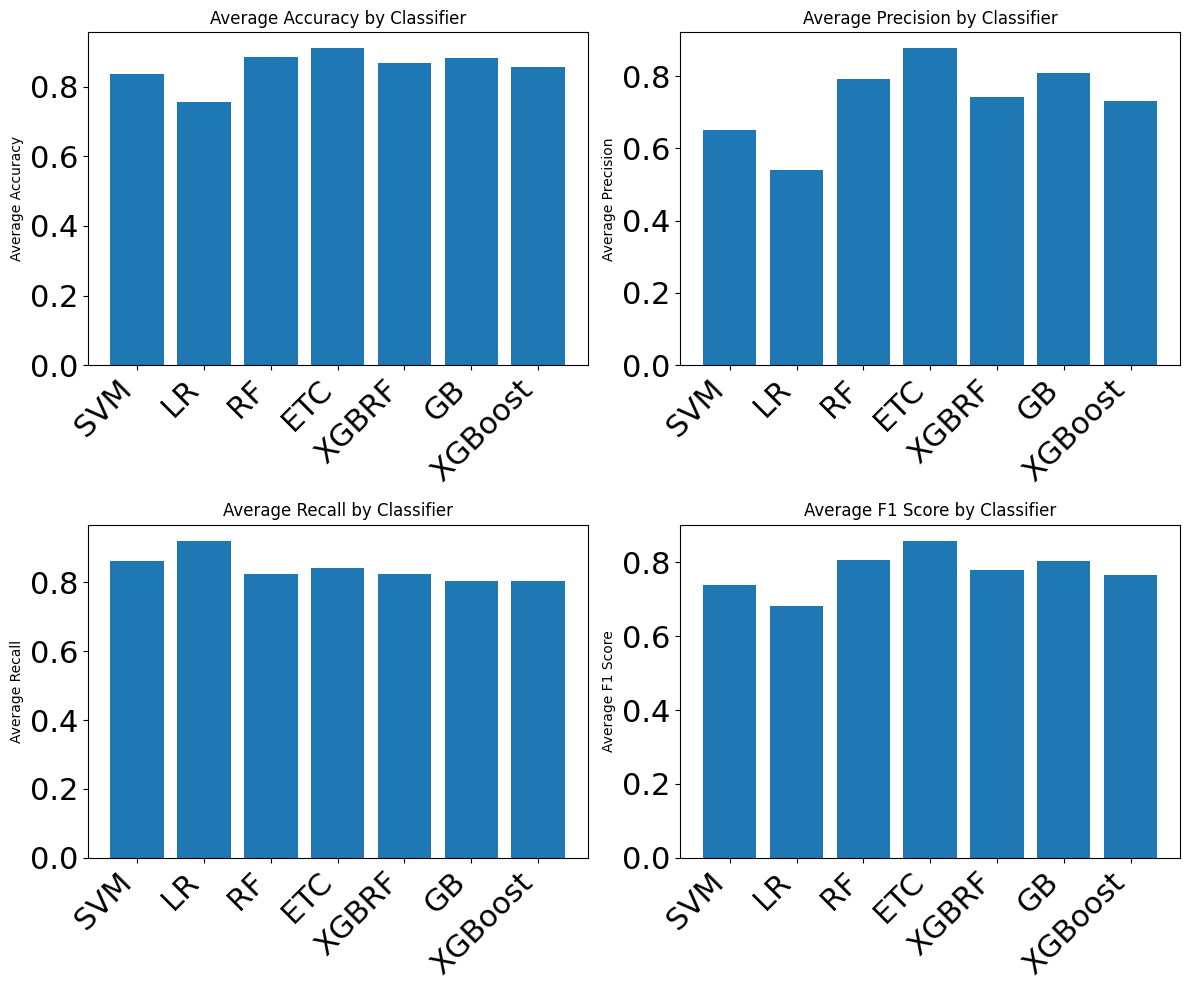

In [ ]:
import matplotlib.pyplot as plt

# Extract the accuracy, precision, recall, and f1 scores from the results
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}
for classifier_name, classifier_results in results.items():
    accuracy_scores[classifier_name] = []
    precision_scores[classifier_name] = []
    recall_scores[classifier_name] = []
    f1_scores[classifier_name] = []
    for sampling_name, result in classifier_results.items():
        accuracy_scores[classifier_name].append(result['accuracy'])
        precision_scores[classifier_name].append(result['precision'])
        recall_scores[classifier_name].append(result['recall'])
        f1_scores[classifier_name].append(result['f1'])

# Plot the bar plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].bar(range(len(accuracy_scores)), [sum(scores) / len(scores) for scores in accuracy_scores.values()])
axs[0, 0].set_xticks(range(len(accuracy_scores)))
axs[0, 0].set_xticklabels(list(accuracy_scores.keys()), rotation=45, ha='right')
axs[0, 0].set_ylabel('Average Accuracy')
axs[0, 0].set_title('Average Accuracy by Classifier')

axs[0, 1].bar(range(len(precision_scores)), [sum(scores) / len(scores) for scores in precision_scores.values()])
axs[0, 1].set_xticks(range(len(precision_scores)))
axs[0, 1].set_xticklabels(list(precision_scores.keys()), rotation=45, ha='right')
axs[0, 1].set_ylabel('Average Precision')
axs[0, 1].set_title('Average Precision by Classifier')

axs[1, 0].bar(range(len(recall_scores)), [sum(scores) / len(scores) for scores in recall_scores.values()])
axs[1, 0].set_xticks(range(len(recall_scores)))
axs[1, 0].set_xticklabels(list(recall_scores.keys()), rotation=45, ha='right')
axs[1, 0].set_ylabel('Average Recall')
axs[1, 0].set_title('Average Recall by Classifier')

axs[1, 1].bar(range(len(f1_scores)), [sum(scores) / len(scores) for scores in f1_scores.values()])
axs[1, 1].set_xticks(range(len(f1_scores)))
axs[1, 1].set_xticklabels(list(f1_scores.keys()), rotation=45, ha='right')
axs[1, 1].set_ylabel('Average F1 Score')
axs[1, 1].set_title('Average F1 Score by Classifier')

plt.tight_layout()
plt.show()

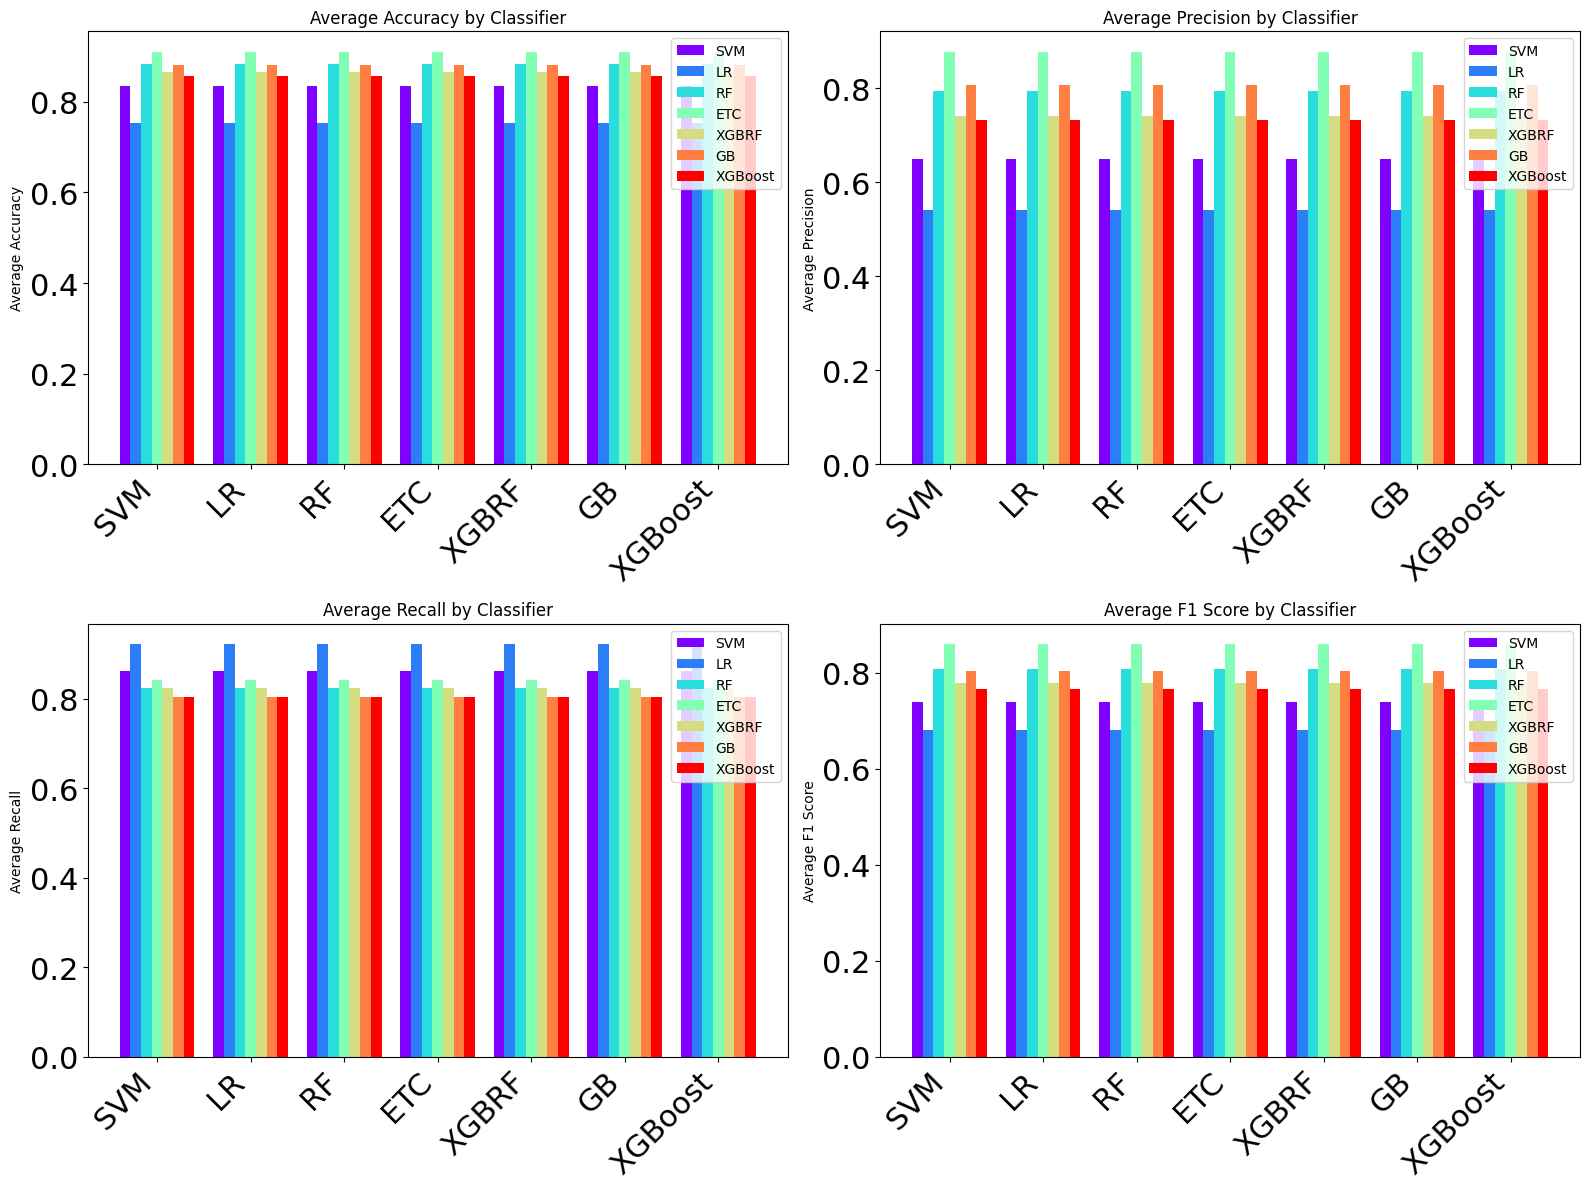

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the accuracy, precision, recall, and f1 scores from the results
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}
for classifier_name, classifier_results in results.items():
    accuracy_scores[classifier_name] = []
    precision_scores[classifier_name] = []
    recall_scores[classifier_name] = []
    f1_scores[classifier_name] = []
    for sampling_name, result in classifier_results.items():
        accuracy_scores[classifier_name].append(result['accuracy'])
        precision_scores[classifier_name].append(result['precision'])
        recall_scores[classifier_name].append(result['recall'])
        f1_scores[classifier_name].append(result['f1'])

# Define a list of colors
colors = plt.cm.rainbow(np.linspace(0, 1, len(accuracy_scores)))

# Plot the bar plots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot accuracy
x = np.arange(len(accuracy_scores))
width = 0.8 / len(accuracy_scores)
for i, (classifier, scores) in enumerate(accuracy_scores.items()):
    axs[0, 0].bar(x + i * width, [sum(scores) / len(scores)], width, color=colors[i], label=classifier)
axs[0, 0].set_xticks(x + (len(accuracy_scores) - 1) * width / 2)
axs[0, 0].set_xticklabels(list(accuracy_scores.keys()), rotation=45, ha='right')
axs[0, 0].set_ylabel('Average Accuracy')
axs[0, 0].set_title('Average Accuracy by Classifier')
axs[0, 0].legend()

# Plot precision
x = np.arange(len(precision_scores))
width = 0.8 / len(precision_scores)
for i, (classifier, scores) in enumerate(precision_scores.items()):
    axs[0, 1].bar(x + i * width, [sum(scores) / len(scores)], width, color=colors[i], label=classifier)
axs[0, 1].set_xticks(x + (len(precision_scores) - 1) * width / 2)
axs[0, 1].set_xticklabels(list(precision_scores.keys()), rotation=45, ha='right')
axs[0, 1].set_ylabel('Average Precision')
axs[0, 1].set_title('Average Precision by Classifier')
axs[0, 1].legend()

# Plot recall
x = np.arange(len(recall_scores))
width = 0.8 / len(recall_scores)
for i, (classifier, scores) in enumerate(recall_scores.items()):
    axs[1, 0].bar(x + i * width, [sum(scores) / len(scores)], width, color=colors[i], label=classifier)
axs[1, 0].set_xticks(x + (len(recall_scores) - 1) * width / 2)
axs[1, 0].set_xticklabels(list(recall_scores.keys()), rotation=45, ha='right')
axs[1, 0].set_ylabel('Average Recall')
axs[1, 0].set_title('Average Recall by Classifier')
axs[1, 0].legend()

# Plot f1 score
x = np.arange(len(f1_scores))
width = 0.8 / len(f1_scores)
for i, (classifier, scores) in enumerate(f1_scores.items()):
    axs[1, 1].bar(x + i * width, [sum(scores) / len(scores)], width, color=colors[i], label=classifier)
axs[1, 1].set_xticks(x + (len(f1_scores) - 1) * width / 2)
axs[1, 1].set_xticklabels(list(f1_scores.keys()), rotation=45, ha='right')
axs[1, 1].set_ylabel('Average F1 Score')
axs[1, 1].set_title('Average F1 Score by Classifier')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBRFClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score

# Load the data
def load_data(file_path):
    return pd.read_csv(file_path)

# Preprocess the data
def preprocess_data(data):
    features = data[['time', 'ejection_fraction', 'serum_creatinine']]
    target = data['DEATH_EVENT']
    return features, target

# Split the data into training and testing sets
def split_data(features, target):
    return train_test_split(features, target, test_size=0.2, random_state=2)

# Standardize the features
def standardize_features(features_train, features_test):
    scaler = StandardScaler()
    features_train_scaled = scaler.fit_transform(features_train)
    features_test_scaled = scaler.transform(features_test)
    return features_train_scaled, features_test_scaled

# Define the classifiers
def define_classifiers():
    classifiers = {
        "SVM": SVC(random_state=2),
        "LR": LogisticRegression(random_state=2),
        "RF": RandomForestClassifier(random_state=2),
        "ETC": ExtraTreesClassifier(random_state=2),
        "XGBRF": XGBRFClassifier(random_state=2),
        "GB": GradientBoostingClassifier(random_state=2),
        'CatBoost':CatBoostClassifier(random_state=2),


        'Neural Network': MLPClassifier(max_iter=1000)
    }
    return classifiers

# Define the parameter grids for hyperparameter tuning
def define_param_grids():
    param_grids = {
        "SVM": {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'rbf']},
        "LR": {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
        "RF": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
        "ETC": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
        "XGBRF": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    'CatBoost': {'iterations': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]},
    'Neural Network': {'hidden_layer_sizes': [(10,), (50,), (100,)]}
}
pca = PCA(n_components=2)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define oversampling techniques
sampling_techniques = {"SMOTE": SMOTE(), "ADASYN": ADASYN() }

# Perform hyperparameter tuning and evaluation
results = {}
for classifier_name, classifier in classifiers.items():
    results[classifier_name] = {}
    for sampling_name, sampler in sampling_techniques.items():
        X_resampled, y_resampled = sampler.fit_resample(X_train_scaled, y_train)
        clf = GridSearchCV(classifier, param_grids[classifier_name], cv=5)
        clf.fit(X_resampled, y_resampled)
        y_pred = clf.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        results[classifier_name][sampling_name] = {
            "best_params": clf.best_params_,
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1
        }

        # Include hyperparameter-tuned model for comparison
        results[classifier_name]["HyperparameterTuned"] = {
            "best_params": clf.best_params_,
            "accuracy": clf.best_score_,
            "precision": precision_score(y_test, clf.predict(X_test_scaled)),
            "recall": recall_score(y_test, clf.predict(X_test_scaled)),
            "f1": f1_score(y_test, clf.predict(X_test_scaled))
        }

# Print results
for classifier_name, classifier_results in results.items():
    print(f"\n{classifier_name}:")
    for sampling_name, result in classifier_results.items():
        print(f"{sampling_name}:")
        print(f" Best Parameters: {result['best_params']}")
        print(f" Accuracy: {result['accuracy']:.4f}")
        print(f" Precision: {result['precision']:.4f}")
        print(f" Recall: {result['recall']:.4f}")
        print(f" F1 Score: {result['f1']:.4f}")




SVM:
SMOTE:
 Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
 Accuracy: 0.8667
 Precision: 0.7143
 Recall: 0.8824
 F1 Score: 0.7895
HyperparameterTuned:
 Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
 Accuracy: 0.8280
 Precision: 0.5926
 Recall: 0.9412
 F1 Score: 0.7273
ADASYN:
 Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
 Accuracy: 0.8000
 Precision: 0.5926
 Recall: 0.9412
 F1 Score: 0.7273

LR:
SMOTE:
 Best Parameters: {'C': 10, 'penalty': 'l2'}
 Accuracy: 0.7667
 Precision: 0.5556
 Recall: 0.8824
 F1 Score: 0.6818
HyperparameterTuned:
 Best Parameters: {'C': 1, 'penalty': 'l2'}
 Accuracy: 0.7527
 Precision: 0.5333
 Recall: 0.9412
 F1 Score: 0.6809
ADASYN:
 Best Parameters: {'C': 1, 'penalty': 'l2'}
 Accuracy: 0.7500
 Precision: 0.5333
 Recall: 0.9412
 F1 Score: 0.6809

RF:
SMOTE:
 Best Parameters: {'max_depth': None, 'n_estimators': 200}
 Accuracy: 0.9167
 Precision: 0.9286
 Recall: 0.7647
 F1 Score: 0.8387
HyperparameterTuned:
 Best Parameter